<a href="https://colab.research.google.com/github/SandhyaKshirsagar/ML-Practice-Projects/blob/main/Netflix_EDA_%2C_Visualization_and_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# render the plot directly below the code cell
%matplotlib inline
import matplotlib.gridspec as gridspec # Class used to specify the geometry of the plot to place subplots.
import matplotlib.font_manager as fm # A module for finding, managing, and using fonts across platforms.
import seaborn as sns
sns.set() # Loads the seaborn's default theme, palette and scaling
import warnings
warnings.filterwarnings(action='ignore') # Ignore any warnings
import datetime as dt
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
import os
import missingno as msno # Python library used for visualizing and analyzing missing data patterns in dataset
import geopandas # Library that helps handle geospacial data. Can be used to plot maps


In [ ]:
# Installing Pycountry
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 13.9 MB/s eta 0:00:00


In [ ]:
import pycountry # A Python library to access ISO country, subdivision, language, currency and script definitions and their translations.

### Applying font for matplotlib visuals

In [ ]:
# Using the font Anton Regular for the matplotlib visualizations
mlt_font = fm.FontProperties(fname='/content/drive/MyDrive/Colab Notebooks/EDA Practise/Netflix EDA/Anton-Regular.ttf')

### Loading Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA Practise/Netflix EDA/netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
data.shape

(8807, 12)

In [ ]:
# Checking for missing data
print("Missing values percentage in dataset columns:\n")
nan_cols = {}
# Calculating the missing value percentages and adding them to a dictionary
for i in data.columns:
  null_percentage = data[i].isna().sum() / len(data) * 100
  nan_cols.update({i:null_percentage})

# Sorting the dictionary in descending order based on the values
keys = list(nan_cols.keys())
values = list(nan_cols.values())
sorted_value_index = np.flip(np.argsort(values))
sorted_nan_cols = {keys[i]: values[i] for i in sorted_value_index}

# Printing the dictionary
for key, value in sorted_nan_cols.items():
  print(f"{key} : {round(value,2)}%")


Missing values percentage in dataset columns:

director : 29.91%
country : 9.44%
cast : 9.37%
date_added : 0.11%
rating : 0.05%
duration : 0.03%
description : 0.0%
listed_in : 0.0%
release_year : 0.0%
title : 0.0%
type : 0.0%
show_id : 0.0%


Text(0.5, 1.0, 'COLUMN WISE MISSING VALUES')

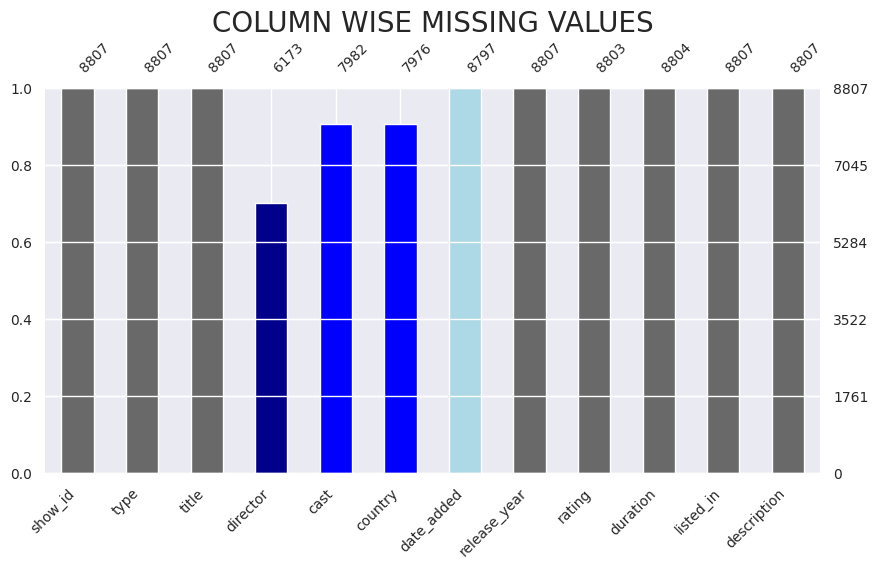

In [ ]:
# Plot missing values in columns
import missingno #Python library for the exploratory visualization of missing data #install using !pip install missingno
color= ['dimgrey','dimgrey','dimgrey','darkblue','blue','blue','lightblue','dimgrey','dimgrey','dimgrey','dimgrey','dimgrey']
missingno.bar(data,fontsize=10,color=color,figsize=(10,5))
plt.title('COLUMN WISE MISSING VALUES',fontsize=20)


6 columns have missing data. The Director column has almost 30% missing values.

Country and Cast have a little over 9% of missing values. Rest of the columns have a negligeable count of missing values.

We can impute the missing values in Director, Country and Cast columns, rest of them, we can do dropna and drop the missing values.

For imputing the missing values in Director and Cast, we can replace the missing value with "Data not available". For Country, we can use mode to fill the missign values.

In [ ]:
# Imputing country missing values
data['country'] = data['country'].fillna(data['country'].mode()[0])

In [ ]:
# Imputing Director and Cast with "Data not Available"
data['director'].replace(np.nan, 'Data not Available', inplace=True)
data['cast'].replace(np.nan, 'Data not Available', inplace=True)

In [ ]:
# Dropping the missing values in the rest of the columns
data.dropna(inplace=True)

# Dropping duplicates if any
data.drop_duplicates(inplace=True)

In [ ]:
# Checking for null values
data.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


Checking the data types of the columns:
All the columns apart from date_added and release_year are all categorical data.

date_added needs to be changed to datetime format

In [ ]:
data['date_added'] = pd.to_datetime(data['date_added'], format='mixed')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 892.7+ KB


In [ ]:
data['month_added'] = data['date_added'].dt.month
data['month_name'] = data['date_added'].dt.month_name()
data['year_added'] = data['date_added'].dt.year

data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Data not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,Data not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021
3,s4,TV Show,Jailbirds New Orleans,Data not Available,Data not Available,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,s5,TV Show,Kota Factory,Data not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021


### Visualizing the dataset

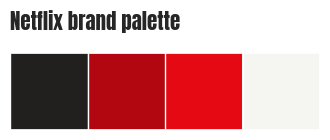

In [ ]:
# Palette
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])

plt.title("Netflix brand palette ",loc='left',font=mlt_font, fontsize=15,y=1.2)
plt.show()

### Netflix Timeline

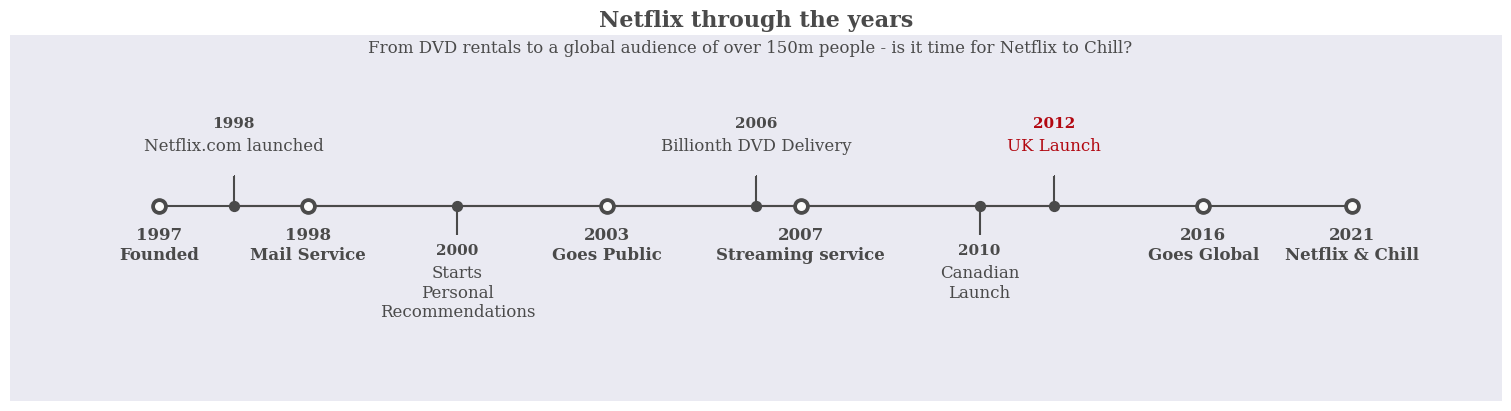

In [ ]:
# Timeline code from Subin An's awesome notebook
# https://www.kaggle.com/subinium/awesome-visualization-with-titanic-dataset

tl_dates = [
    "1997\nFounded",
    "1998\nMail Service",
    "2003\nGoes Public",
    "2007\nStreaming service",
    "2016\nGoes Global",
    "2021\nNetflix & Chill"
]

tl_x = [1, 2, 4, 5.3, 8,9]

## these go on the numbers
tl_sub_x = [1.5,3,5,6.5,7]


tl_sub_times = [
    "1998","2000","2006","2010","2012"
]

tl_text = [
    "Netflix.com launched",
    "Starts\nPersonal\nRecommendations","Billionth DVD Delivery","Canadian\nLaunch","UK Launch"]



# Set figure & Axes
fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
ax.set_ylim(-2, 1.75)
ax.set_xlim(0, 10)


# Timeline : line
ax.axhline(0, xmin=0.1, xmax=0.9, c='#4a4a4a', zorder=1)

# Timeline : Date Points
ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)
# Timeline : Time Points
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a',zorder=4)

# Date Text
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.55, date, ha='center',
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a',fontsize=12)


# Stemplot : vertical line
levels = np.zeros(len(tl_sub_x))
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')

# Text
for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3*(idx%2)-0.5, time, ha='center',
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a' if idx!=len(tl_sub_x) else '#b20710', fontsize=11)

    ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center',
        fontfamily='serif',color='#4a4a4a' if idx!=len(tl_sub_x) else '#b20710')

# Spine
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Ticks
ax.set_xticks([])
ax.set_yticks([])

# Title
ax.set_title("Netflix through the years", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')
ax.text(2.4,1.57,"From DVD rentals to a global audience of over 150m people - is it time for Netflix to Chill?", fontfamily='serif', fontsize=12, color='#4a4a4a')

plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
 12  month_added   8790 non-null   int32         
 13  month_name    8790 non-null   object        
 14  year_added    8790 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), o

### Exploring the Type column

In [ ]:
data['type'].nunique()

2

In [ ]:
data.groupby(['type'])['type'].count()


,type
type,
Movie,6126
TV Show,2664


In [ ]:
type_count = data['type'].value_counts()
data_len = len(data)
type_ratio = (type_count/data_len).round(2)
type_ratio

,count
type,
Movie,0.7
TV Show,0.3


In [ ]:
type_ratio_df = pd.DataFrame(type_ratio).T
type_ratio_df

type,Movie,TV Show
count,0.7,0.3


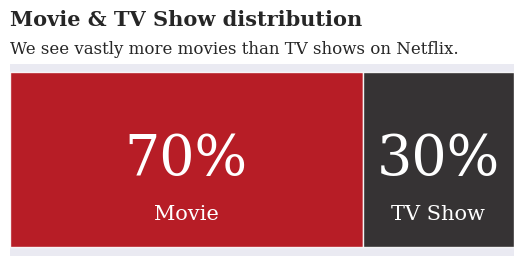

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))

ax.barh(type_ratio_df.index, type_ratio_df['Movie'],
        color='#b20710', alpha=0.9, label='Male')
ax.barh(type_ratio_df.index, type_ratio_df['TV Show'], left=type_ratio_df['Movie'],
        color='#221f1f', alpha=0.9, label='Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
#ax.set_yticklabels(mf_ratio.index, fontfamily='serif', fontsize=11)


# movie percentage
for i in type_ratio_df.index:
    ax.annotate(f"{int(type_ratio_df['Movie'][i]*100)}%",
                   xy=(type_ratio_df['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Movie",
                   xy=(type_ratio_df['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')

for i in type_ratio_df.index:
    ax.annotate(f"{int(type_ratio_df['TV Show'][i]*100)}%",
                   xy=(type_ratio_df['Movie'][i]+type_ratio_df['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("TV Show",
                   xy=(type_ratio_df['Movie'][i]+type_ratio_df['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')






# Title & Subtitle
fig.text(0.125,1.03,'Movie & TV Show distribution', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'We see vastly more movies than TV shows on Netflix.',fontfamily='serif',fontsize=12)

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)



#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

# Removing legend due to labelled plot
ax.legend().set_visible(False)
plt.show()

In [ ]:
type_ratio_df['Movie']*100

,Movie
count,70.0


In [ ]:
labels = ['Movie', 'TV Show']
values = []
for i in labels:
  values.append(type_ratio_df[i]['count']*100)
#fig = px.pie(type_ratio, values='count',names=labels, title='Movie vs TV Show')


fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.2])])

fig.update_traces(textposition='inside', textinfo='percent+label', hoverinfo='label+percent', marker=dict(colors=['red','#706B70']))
fig.update_layout(
    template=None,
    font_family="Anton Regular",
    font_color="white",
    font_size=18,
    paper_bgcolor="#363336",
    title=dict(text="Movie and TV Show contribution", font=dict(size=28)),
    legend_font=dict(size=18))
# Show the chart
fig.show()

###Movie and TV Shows Trend

In [ ]:
type_data = data[['type','release_year']]
type_data

,type,release_year
0,Movie,2020
1,TV Show,2021
2,TV Show,2021
3,TV Show,2021
4,TV Show,2021
...,...,...
8802,Movie,2007
8803,TV Show,2018
8804,Movie,2009
8805,Movie,2006


In [ ]:
tv_show = type_data[type_data['type'] == 'TV Show'].groupby('release_year')['type'].count()
movie = type_data[type_data['type'] == 'Movie'].groupby('release_year')['type'].count()


Text(2000.5, 700, 'Movie vs TV Show, Trend analysis')

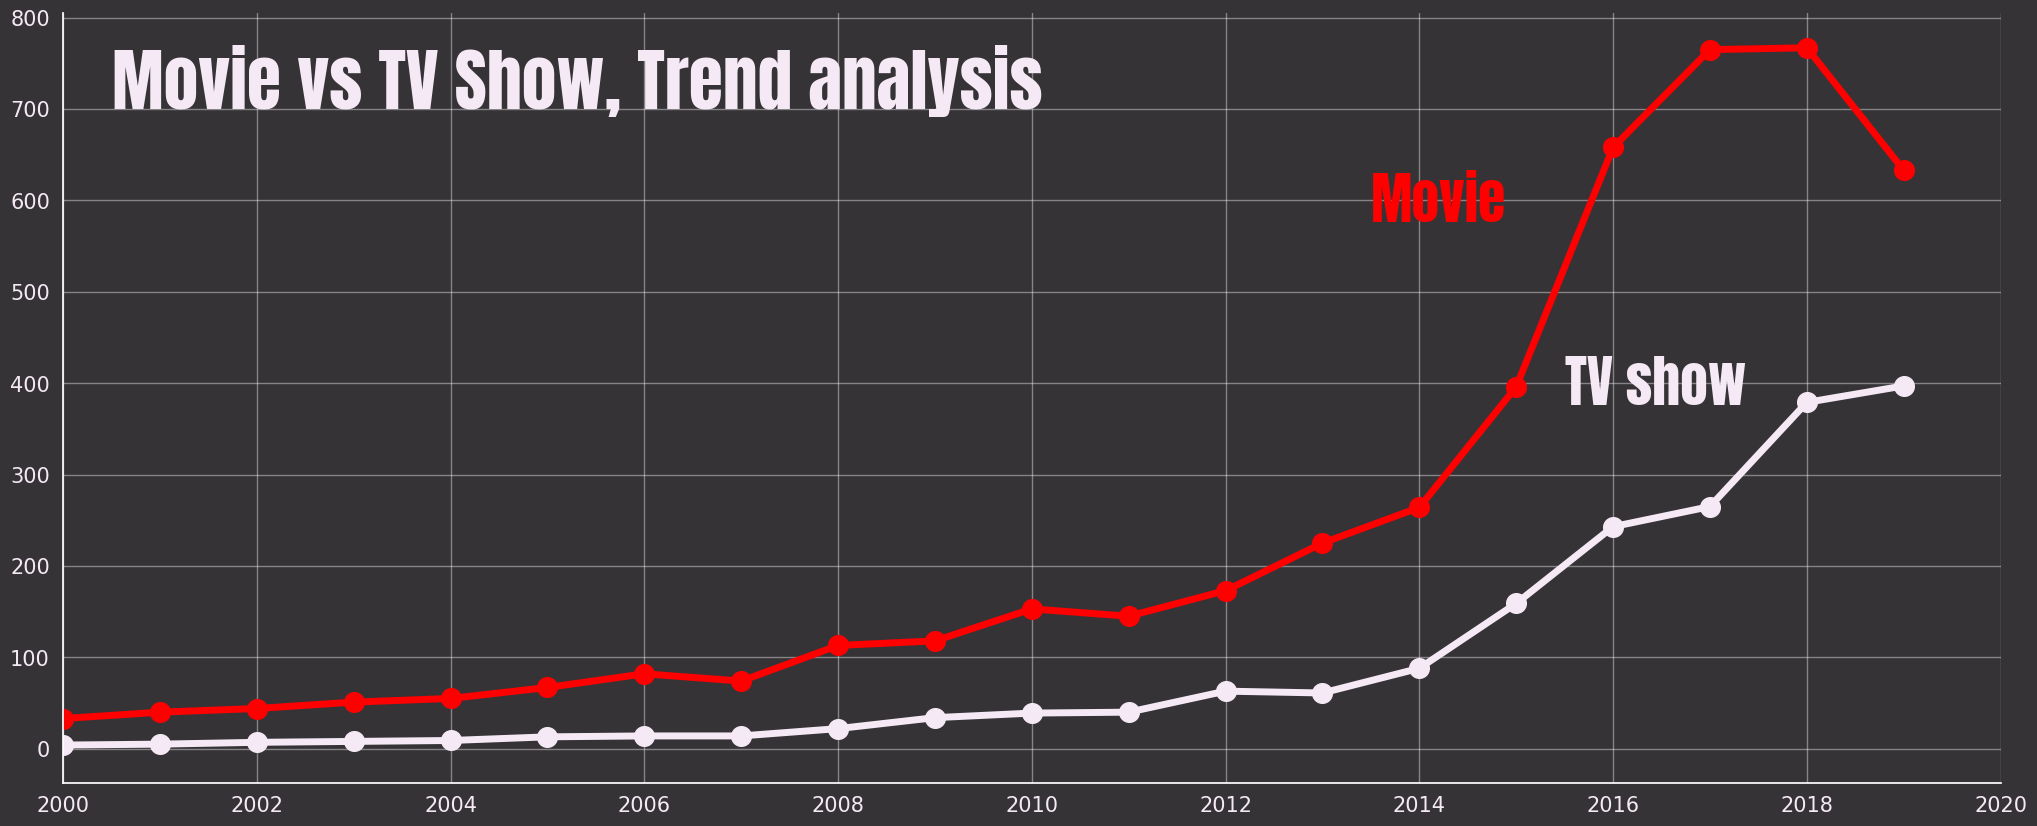

In [ ]:
fig, ax = plt.subplots(figsize=(25,10), facecolor='#363336')
ax.patch.set_facecolor("#363336")

#spec = gridspec.GridSpec(ncols=21, nrows=21, figure=fig)
ax.scatter(x=list(dict(tv_show).keys())[:-2], y=list(dict(tv_show).values())[:-2], s=200, color='#F5E9F5')
ax.scatter(x=list(dict(movie).keys())[:-2], y=list(dict(movie).values())[:-2], s=200, color='red')

sns.lineplot(x=list(dict(tv_show).keys())[:-2], y=list(dict(tv_show).values())[:-2], lw=5, color='#F5E9F5', ax=ax)
sns.lineplot(x=list(dict(movie).keys())[:-2], y=list(dict(movie).values())[:-2], lw=5, color='red', ax=ax)

ax.text(s='Movie', x=2013.5, y=600, font=mlt_font, color='red', va = 'center', ha='left', fontsize=40)
ax.text(s="TV show", x=2015.5, y= 400,font=mlt_font,color='#F5E9F5', va="center",ha="left",fontsize=40)

ax.set_xticks(list(range(2000,2022,2)))
ax.tick_params(axis='x', colors='#F5E9F5', labelsize=15)
ax.tick_params(axis='y', colors='#F5E9F5', labelsize=15)

ax.spines['bottom'].set_color('White')
ax.spines['left'].set_color('white')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xlim(2000, 2020)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(True, alpha=0.4)
ax.text(s='Movie vs TV Show, Trend analysis', x=2000.5, y=700, font=mlt_font, color='#F5E9F5', fontsize=50)

### Analysis by Country

In [ ]:
data['country'].nunique()

748

There are 748 countries listed in the data set

In [ ]:
data['country'].value_counts()

,count
country,
United States,3638
India,972
United Kingdom,418
Japan,243
South Korea,199
...,...
"Romania, Bulgaria, Hungary",1
"Uruguay, Guatemala",1
"France, Senegal, Belgium",1


In [ ]:
def count_repeats(cell):
    countries = cell.split(',')
    return len(countries)

data['country_count'] = data['country'].apply(lambda x: count_repeats(x))


In [ ]:
data[data['country_count'] > 1]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name,year_added,country_count
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,September,2021,6
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,9,September,2021,2
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France",2021-09-19,2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ...",9,September,2021,3
38,s39,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States",2021-09-16,2017,PG-13,96 min,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...,9,September,2021,3
46,s47,Movie,Safe House,Daniel Espinosa,"Denzel Washington, Ryan Reynolds, Vera Farmiga...","South Africa, United States, Japan",2021-09-16,2012,R,115 min,Action & Adventure,Young CIA operative Matt Weston must get a dan...,9,September,2021,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8788,s8789,Movie,You Carry Me,Ivona Juka,"Lana Baric, Vojislav Brajovic, Natasa Janjic, ...","Croatia, Slovenia, Serbia, Montenegro",2016-07-01,2015,TV-MA,157 min,"Dramas, International Movies","A soap opera producer, director and makeup art...",7,July,2016,4
8794,s8795,Movie,اشتباك,Mohamed Diab,"Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahme...","Egypt, France",2018-10-11,2016,TV-14,98 min,"Dramas, Independent Movies, International Movies",Amid the tumult following Egyptian President M...,10,October,2018,2
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,Data not Available,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,5,May,2018,2
8797,s8798,TV Show,Zak Storm,Data not Available,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,9,September,2018,4


In [ ]:
data.sort_values(by=['country_count'], ascending=False)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name,year_added,country_count
6233,s6234,Movie,Barbecue,Matthew Salleh,Data not Available,"Australia, Armenia, Japan, Jordan, Mexico, Mon...",2017-08-15,2017,TV-MA,101 min,"Documentaries, International Movies",A blend of cultural nuance and mesmerizing tec...,8,August,2017,12
8403,s8404,Movie,The Look of Silence,Joshua Oppenheimer,Data not Available,"Denmark, Indonesia, Finland, Norway, United Ki...",2016-02-26,2014,PG-13,103 min,"Documentaries, International Movies","In a society terrorized into silence, the brot...",2,February,2016,10
1506,s1507,TV Show,Shaun the Sheep,Data not Available,"John Sparkes, Justin Fletcher, Kate Harbour, R...","United Kingdom, Finland, Germany, United State...",2020-12-22,2016,TV-Y,2 Seasons,"British TV Shows, Kids' TV, TV Comedies",Join freewheeling Shaun for barnyard misadvent...,12,December,2020,8
1549,s1550,Movie,The Professor and the Madman,Farhad Safinia,"Mel Gibson, Sean Penn, Natalie Dormer, Eddie M...","Ireland, France, Iceland, United States, Mexic...",2020-12-15,2019,TV-14,125 min,"Dramas, Independent Movies",While working on the first Oxford English Dict...,12,December,2020,8
8225,s8226,Movie,The Breadwinner,Nora Twomey,"Saara Chaudry, Soma Chhaya, Ali Badshah, Soma ...","Ireland, Canada, Luxembourg, United States, Un...",2018-02-20,2017,PG-13,93 min,"Children & Family Movies, Dramas, Internationa...",A courageous 11-year-old Afghan girl disguises...,2,February,2018,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156,s3157,Movie,Zero Hour,Robert O. Peters,"Richard Mofe-Damijo, Alex Ekubo, Ali Nuhu, Rah...",United States,2019-12-13,2018,TV-MA,89 min,"International Movies, Thrillers","After his father passes, the heir to a retail ...",12,December,2019,1
3155,s3156,Movie,The 9th Precinct,Ding-Lin Wang,"Roy Chiu, Chia-Chia Peng, Wen Chen-ling, Eugen...",Taiwan,2019-12-13,2019,TV-MA,95 min,"International Movies, Thrillers",An idealistic cop joins an underground police ...,12,December,2019,1
3154,s3155,Movie,Seven and a half dates,Biodun Stephen,"Mercy Johnson, Jim Iyke, Toyin Abraham, Sola S...",United States,2019-12-13,2018,TV-14,107 min,"Dramas, International Movies, Romantic Movies","Engrossed in her career, a young woman relucta...",12,December,2019,1
3153,s3154,Movie,Okafor's Law,Omoni Oboli,Data not Available,Nigeria,2019-12-13,2016,TV-14,110 min,"Comedies, International Movies, Romantic Movies",An unapologetic lothario sets out to seduce th...,12,December,2019,1


In [ ]:
from typing import Counter
country = data['country']
country = list(country)
total = []
for i in range(len(country)):
  total += str(country[i]).split(', ')
country_data = Counter(total)
country_data

Counter({'United States': 4509,
         'South Africa': 62,
         'India': 1046,
         'Ghana': 5,
         'Burkina Faso': 1,
         'United Kingdom': 803,
         'Germany': 226,
         'Ethiopia': 1,
         'Czech Republic': 22,
         'Mexico': 169,
         'Turkey': 113,
         'Australia': 158,
         'France': 393,
         'Finland': 11,
         'China': 162,
         'Canada': 445,
         'Japan': 316,
         'Nigeria': 103,
         'Spain': 232,
         'Belgium': 90,
         'South Korea': 231,
         'Singapore': 41,
         'Italy': 99,
         'Romania': 14,
         'Argentina': 91,
         'Venezuela': 4,
         'Hong Kong': 105,
         'Russia': 27,
         '': 2,
         'Ireland': 46,
         'Nepal': 2,
         'New Zealand': 33,
         'Brazil': 97,
         'Greece': 11,
         'Jordan': 9,
         'Colombia': 52,
         'Switzerland': 19,
         'Israel': 30,
         'Taiwan': 89,
         'Bulgaria': 10,
      

In [ ]:
type(country_data)

collections.Counter

In [ ]:
country_data = sorted(country_data.items(), key=lambda x : x[1],reverse=True)
country_name = list(map(lambda x:x[0], country_data))
country_count = list(map(lambda x:x[1], country_data))
country_data_df = pd.DataFrame(country_name, country_count).reset_index()
country_data_df.columns=['count', 'country']
country_data_df['country'] = country_data_df['country'].apply(lambda x:x.replace(',',''))

In [ ]:
country_data_df.head()

,count,country
0,4509,United States
1,1046,India
2,803,United Kingdom
3,445,Canada
4,393,France


In [ ]:
country_data_df.country[country_data_df.country == 'Turkey'] = 'Türkiye'

In [ ]:
country_data_df[country_data_df['country'] == 'West Germany']

,count,country
64,5,West Germany


In [ ]:
country_data_df.country[country_data_df.country == 'West Germany'] = 'Germany'

In [ ]:
country_data_df.country[country_data_df.country == 'Soviet Union'] = 'Russian Federation'

In [ ]:
country_data_df.country[country_data_df.country == 'East Germany'] = 'Germany'

In [ ]:
for x in pycountry.countries:
  print(x.alpha_3 +'  --   '+x.name)

ABW  --   Aruba
AFG  --   Afghanistan
AGO  --   Angola
AIA  --   Anguilla
ALA  --   Åland Islands
ALB  --   Albania
AND  --   Andorra
ARE  --   United Arab Emirates
ARG  --   Argentina
ARM  --   Armenia
ASM  --   American Samoa
ATA  --   Antarctica
ATF  --   French Southern Territories
ATG  --   Antigua and Barbuda
AUS  --   Australia
AUT  --   Austria
AZE  --   Azerbaijan
BDI  --   Burundi
BEL  --   Belgium
BEN  --   Benin
BES  --   Bonaire, Sint Eustatius and Saba
BFA  --   Burkina Faso
BGD  --   Bangladesh
BGR  --   Bulgaria
BHR  --   Bahrain
BHS  --   Bahamas
BIH  --   Bosnia and Herzegovina
BLM  --   Saint Barthélemy
BLR  --   Belarus
BLZ  --   Belize
BMU  --   Bermuda
BOL  --   Bolivia, Plurinational State of
BRA  --   Brazil
BRB  --   Barbados
BRN  --   Brunei Darussalam
BTN  --   Bhutan
BVT  --   Bouvet Island
BWA  --   Botswana
CAF  --   Central African Republic
CAN  --   Canada
CCK  --   Cocos (Keeling) Islands
CHE  --   Switzerland
CHL  --   Chile
CHN  --   China
CIV  --   C

In [ ]:
country_data_df['country'] = country_data_df['country'].apply(lambda x:pycountry.countries.search_fuzzy(x)[0].alpha_3)
country_data_df.head()

,count,country
0,4509,USA
1,1046,IND
2,803,GBR
3,445,CAN
4,393,FRA


In [ ]:
country_data_sum = country_data_df.groupby('country').sum()
country_data_sum = country_data_sum.reset_index()

Creating the world map

In [ ]:
!pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.5 MB/s eta 0:00:00


In [ ]:
!pip install geopandas

In [ ]:
!pip install geodatasets

In [ ]:
import mapclassify
import matplotlib as mpl
import fsspec

url = "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip"

with fsspec.open(f"simplecache::{url}") as file:
  world = geopandas.read_file(file)
#world = geopandas.read_file(geodatasets.get_path('naturalearth_lowres'))
  world2 = world.merge(country_data_sum, left_on='iso_a3', right_on='country')

fig, ax = plt.subplots(figsize = (25,10), facecolor='#363336')
ax.patch.set_facecolor('gray')

vmin, vmax = 1, 5000
cmap = 'YlOrRd'
world.plot(ax=ax, color='#363336', edgecolor='black')
world2.plot(
    column='count',
    ax=ax,
    cmap='YlOrRd',
    scheme='quantiles',
    edgecolor='black',
    legend=True,
    legend_kwds={'title':'No.of movies or shows released', 'loc':'lower left'})
#norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
plt.text(s="Netflix's global popularity.", x=-100, y=110, font=mlt_font, color='#F5E9F5', va='center', ha='left', fontsize=50)
plt.axis('off')
#plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),cax=ax, label="Release Count", orientation='horizontal')
plt.show()

ClientResponseError: 500, message='Internal Server Error', url='https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip'

Countrywise popularity of netflix

In [ ]:
country_name[:10].sort(reverse=True)

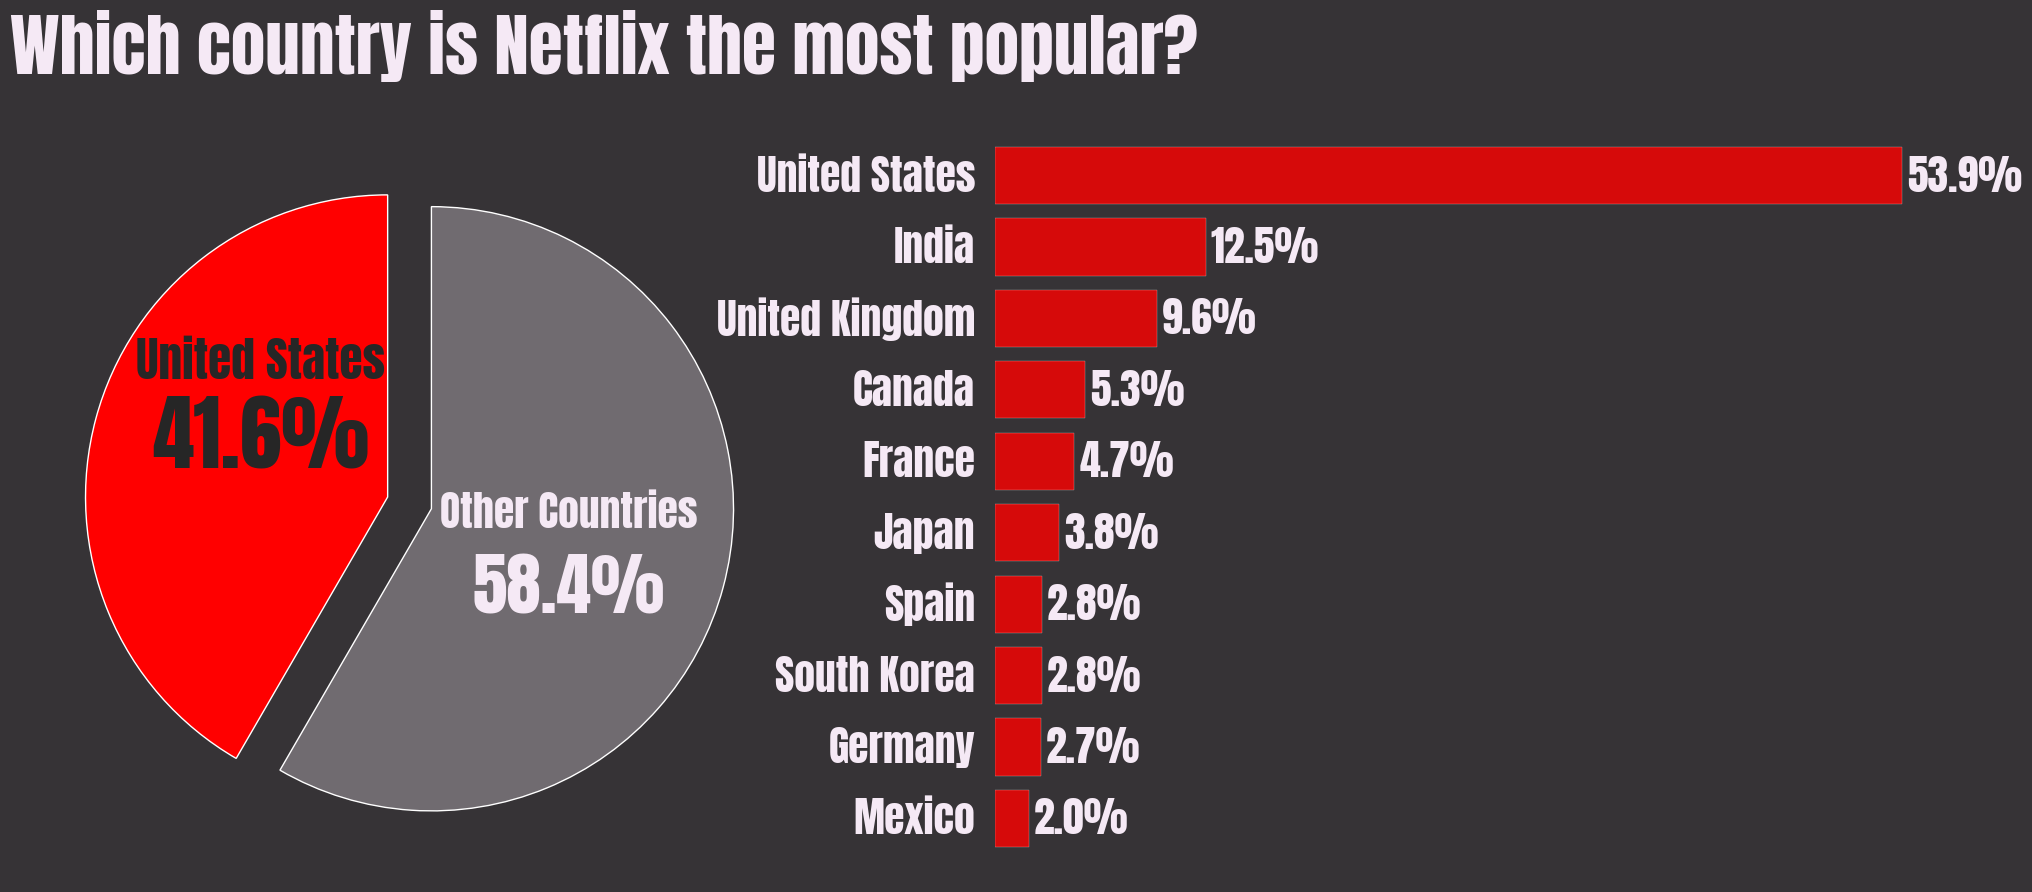

In [ ]:
labels = ['United States', 'Other Countries']
sizes = [country_data_df['count'][0], sum(country_data_df['count'][1:])]
explode = (0, 0.15)

fig, ax = plt.subplots(figsize=(25,10),facecolor="#363336")
ax.patch.set_facecolor('#363336')

spec = gridspec.GridSpec(ncols=10, nrows=1, figure=fig)
ax1 = fig.add_subplot(spec[0, :4],facecolor="#363336")
ax2 = fig.add_subplot(spec[0, 5:],facecolor="#363336")

ax1.pie(sizes, explode=explode, startangle=90, colors =['red','#706B70'])
ax1.text(s=labels[0],x=-0.42,y=0.45, font=mlt_font,fontsize=34,va='center',ha='center')
ax1.text(s=f"{round(sizes[0]/(sizes[0]+sizes[1]) * 100,1)}%",x=-0.42,y=0.2, font=mlt_font,fontsize=60,va='center',ha='center')
ax1.text(s=labels[1],x=0.6,y=-0.05, font=mlt_font,fontsize=30,color='#F5E9F5',va='center',ha='center')
ax1.text(s=f"{round(sizes[1]/(sizes[0]+sizes[1]) * 100,1)}%",x=0.6,y=-0.3, font=mlt_font,fontsize=50,color='#F5E9F5',va='center',ha='center')
country_name_10 = country_name[:10]
country_count_10 = country_count[:10]
country_name_10 = country_name_10[::-1]
country_count_10 = country_count_10[::-1]
ax2.barh(width=country_count_10, y=country_name_10, color = 'red', alpha=0.8, linewidth=0.2)
for i in range(10):
    ax2.text(s=f"{country_name_10[i]}",x=-100,y=i,font=mlt_font,color='#F5E9F5', va="center",ha="right",fontsize=30)
    ax2.text(s=f"{round(country_count_10[i]/sum(country_count_10)*100,1)}%",x=country_count_10[i]+25,y=i,font=mlt_font,color='#F5E9F5', va="center",ha="left",fontsize=30)

ax2.axis("off")
ax.axis("off")
ax.text(s="Which country is Netflix the most popular?", x= 0,y=1.05, font=mlt_font,color='#F5E9F5',fontsize=50)
plt.show()

In [ ]:
country_name_10[::-1]

['United States',
 'India',
 'United Kingdom',
 'Canada',
 'France',
 'Japan',
 'Spain',
 'South Korea',
 'Germany',
 'Mexico']

In [ ]:
# Getting the name of the first country mentioned under the country column
data['first_country'] = data['country'].apply(lambda x: x.split(",")[0])

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name,year_added,country_count,first_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Data not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021,1,United States
1,s2,TV Show,Blood & Water,Data not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021,1,South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021,1,United States
3,s4,TV Show,Jailbirds New Orleans,Data not Available,Data not Available,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021,1,United States
4,s5,TV Show,Kota Factory,Data not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021,1,India


In [ ]:
country_type_data = data[['type','first_country']]
country_type_data

,type,first_country
0,Movie,United States
1,TV Show,South Africa
2,TV Show,United States
3,TV Show,United States
4,TV Show,India
...,...,...
8802,Movie,United States
8803,TV Show,United States
8804,Movie,United States
8805,Movie,United States


In [ ]:
country_tv_show = country_type_data[country_type_data['type'] == 'TV Show'].groupby('first_country')['type'].count()
country_movie = country_type_data[country_type_data['type'] == 'Movie'].groupby('first_country')['type'].count()

In [ ]:
# Getting top 11 country names
country_order = data['first_country'].value_counts()[:11].index
country_order

Index(['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France',
       'South Korea', 'Spain', 'Mexico', 'Australia', 'Egypt'],
      dtype='object', name='first_country')

In [ ]:
# make a pivot table for the 11 countries showing the count of movies and tv shows
country_with_type = data[['type', 'first_country']].groupby('first_country')['type'].value_counts().unstack().loc[country_order]
country_with_type

type,Movie,TV Show
first_country,,
United States,2800.0,1231.0
India,927.0,81.0
United Kingdom,382.0,245.0
Canada,187.0,84.0
Japan,85.0,172.0
France,148.0,64.0
South Korea,47.0,164.0
Spain,129.0,52.0
Mexico,86.0,48.0


In [ ]:
# calculating the sum of movies and tv shows for each country
country_with_type['sum'] = country_with_type.sum(axis=1)
country_with_type

type,Movie,TV Show,sum
first_country,,,
United States,2800.0,1231.0,4031.0
India,927.0,81.0,1008.0
United Kingdom,382.0,245.0,627.0
Canada,187.0,84.0,271.0
Japan,85.0,172.0,257.0
France,148.0,64.0,212.0
South Korea,47.0,164.0,211.0
Spain,129.0,52.0,181.0
Mexico,86.0,48.0,134.0


In [ ]:
country_with_type_ratio = (country_with_type.T/country_with_type['sum']).T[['Movie','TV Show']].sort_values(by='Movie', ascending=True)

In [ ]:
country_with_type_ratio

type,Movie,TV Show
first_country,,
South Korea,0.222749,0.777251
Japan,0.330739,0.669261
Australia,0.530435,0.469565
United Kingdom,0.609250,0.390750
Mexico,0.641791,0.358209
Canada,0.690037,0.309963
United States,0.694617,0.305383
France,0.698113,0.301887
Spain,0.712707,0.287293


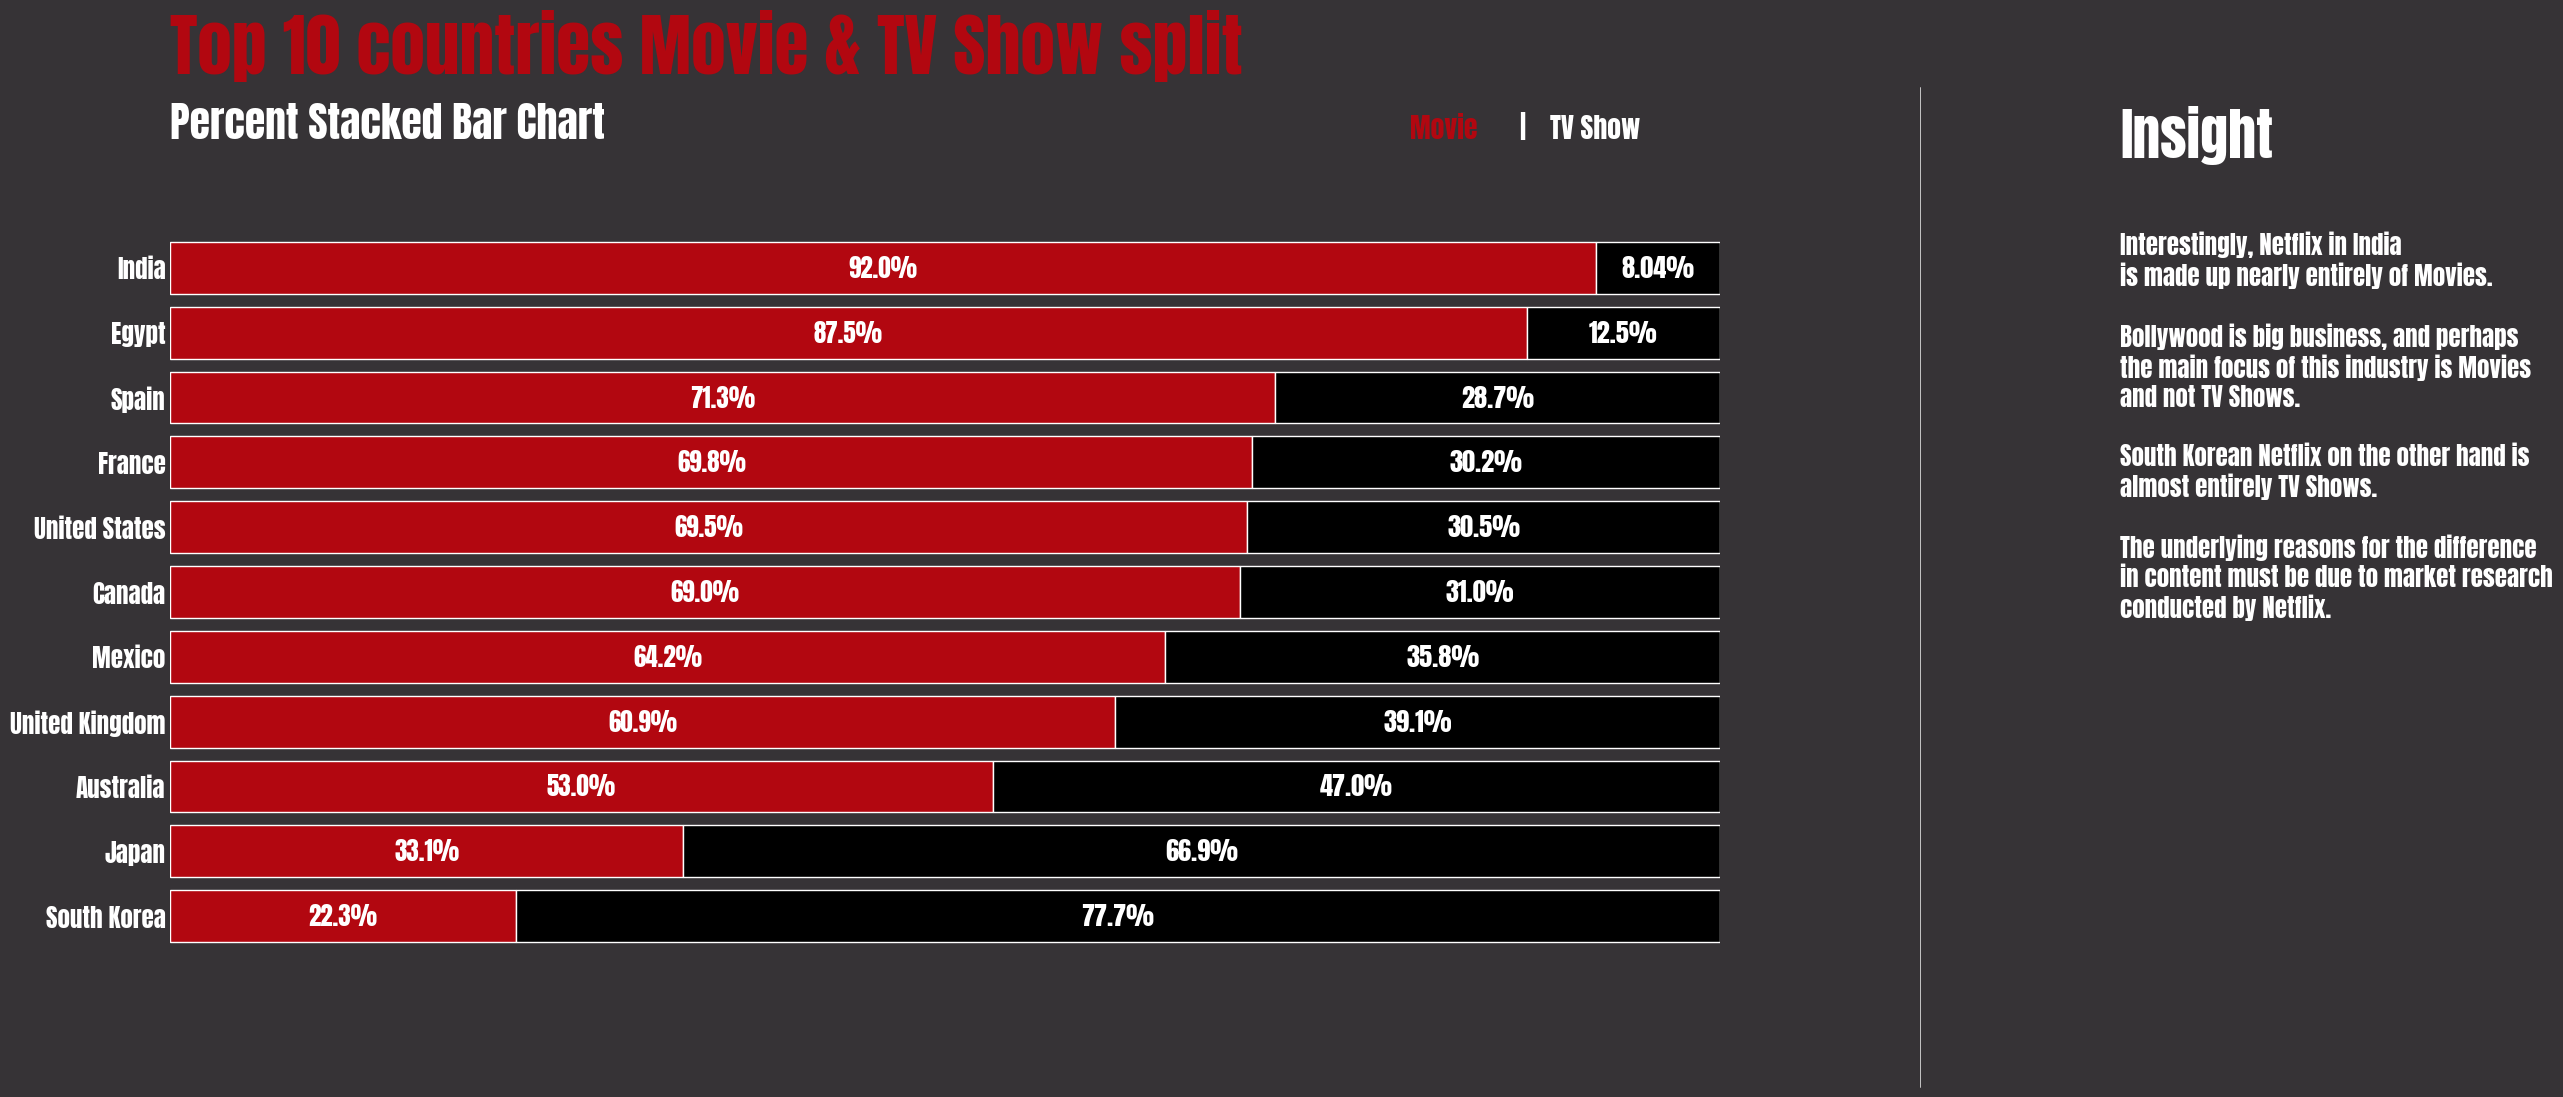

In [ ]:
# Plotting the above data
fig, ax = plt.subplots(1,1,figsize=(20,10),)
fig.patch.set_facecolor('#363336')
ax.patch.set_facecolor('#363336')
ax.barh(country_with_type_ratio.index, country_with_type_ratio['Movie'], color='#b20710', alpha=1, label='Movie')
ax.barh(country_with_type_ratio.index, country_with_type_ratio['TV Show'], left=country_with_type_ratio['Movie'], color='black', alpha=1, label='TV Show')

ax.set_xlim(0,1)
ax.set_xticks([])
ax.set_yticklabels(country_with_type_ratio.index, color='white', font=mlt_font, fontsize=25)


for i in country_with_type_ratio.index:
  ax.annotate(f"{country_with_type_ratio['Movie'][i]*100:.3}%",
             xy=(country_with_type_ratio['Movie'][i]/2, i),
             va = "center", ha='center', color='white', font=mlt_font, fontsize=18)

for i in country_with_type_ratio.index:
  ax.annotate(f"{country_with_type_ratio['TV Show'][i]*100:.3}%",
              xy=(country_with_type_ratio['Movie'][i] + country_with_type_ratio['TV Show'][i]/2, i),
              va = "center", ha='center', color='white', font=mlt_font, fontsize=19)

plt.text(s="Top 10 countries Movie & TV Show split", x=0, y=13, font=mlt_font, fontsize=50, color='#b20710')
plt.text(s="Percent Stacked Bar Chart", x=0, y=12, font=mlt_font, fontsize=30, color='white')
#fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', color='white')
#fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', color='white')

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))
plt.text(s="Movie", x=0.80, y=12, font=mlt_font, fontsize=20, color='#b20710')
plt.text(s="|", x=0.87, y=12, font=mlt_font, fontsize=20, color='white')
plt.text(s="TV Show", x=0.89, y=12, font=mlt_font, fontsize=20, color='white')
#fig.text(0.75,0.9,"Movie", color='#b20710')
#fig.text(0.81,0.9,"|", color='white')
#fig.text(0.82,0.9,"TV Show", color='white')


fig.text(1.1, 0.93, 'Insight', color='white', font=mlt_font, fontsize=40)

fig.text(1.1, 0.44, '''
Interestingly, Netflix in India
is made up nearly entirely of Movies.

Bollywood is big business, and perhaps
the main focus of this industry is Movies
and not TV Shows.

South Korean Netflix on the other hand is
almost entirely TV Shows.

The underlying reasons for the difference
in content must be due to market research
conducted by Netflix.
''', color='white', font=mlt_font, fontsize=18)



import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='white',lw=0.5)
fig.lines.extend([l1])




ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='both',length=0)

plt.show()


###Movie ratings analysis

In [ ]:
data['rating'].value_counts()

,count
rating,
TV-MA,3205
TV-14,2157
TV-PG,861
R,799
PG-13,490
TV-Y7,333
TV-Y,306
PG,287
TV-G,220


In [ ]:
# Rating ages from this notebook: https://www.kaggle.com/andreshg/eda-beginner-to-expert-plotly (thank you!)

ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

data['rating_ages'] = data['rating'].replace(ratings_ages)
data['rating_ages'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids'], dtype=object)

In [ ]:
data['genre'] = data['listed_in'].apply(lambda x:x.replace(' ,',',').replace(', ',',').split(','))

In [ ]:
# Helper column for various plots
data['count'] = 1
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name,year_added,country_count,first_country,rating_ages,genre,count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Data not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021,1,United States,Teens,[Documentaries],1
1,s2,TV Show,Blood & Water,Data not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021,1,South Africa,Adults,"[International TV Shows, TV Dramas, TV Mysteries]",1
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021,1,United States,Adults,"[Crime TV Shows, International TV Shows, TV Ac...",1
3,s4,TV Show,Jailbirds New Orleans,Data not Available,Data not Available,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021,1,United States,Adults,"[Docuseries, Reality TV]",1
4,s5,TV Show,Kota Factory,Data not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021,1,India,Adults,"[International TV Shows, Romantic TV Shows, TV...",1


In [ ]:
rating_df = pd.DataFrame(data['rating'].value_counts().reset_index())
rating_df

,rating,count
0,TV-MA,3205
1,TV-14,2157
2,TV-PG,861
3,R,799
4,PG-13,490
5,TV-Y7,333
6,TV-Y,306
7,PG,287
8,TV-G,220
9,NR,79


In [ ]:
ratings = list(rating_df['rating'])
ratings

['TV-MA',
 'TV-14',
 'TV-PG',
 'R',
 'PG-13',
 'TV-Y7',
 'TV-Y',
 'PG',
 'TV-G',
 'NR',
 'G',
 'TV-Y7-FV',
 'NC-17',
 'UR']

In [ ]:

data.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
type,,,,,,,,,,,,,,
Movie,41,3,75,287,490,797,1427,126,2062,540,131,139,5,3
TV Show,0,0,4,0,0,2,730,94,1143,321,175,194,1,0


In [ ]:
# groupby type, value_counts for rating. Unstack it, sort and fill na with 0, convert the values to int. Then arrange it in the same order as ratings list generated above
ratings_type = data.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)[ratings]
ratings_type


rating,TV-MA,TV-14,TV-PG,R,PG-13,TV-Y7,TV-Y,PG,TV-G,NR,G,TV-Y7-FV,NC-17,UR
type,,,,,,,,,,,,,,
Movie,2062,1427,540,797,490,139,131,287,126,75,41,5,3,3
TV Show,1143,730,321,2,0,194,175,0,94,4,0,1,0,0


In [ ]:
# Seperating movies and tv shows from the rating type df
ratings_type_movie = ratings_type.loc['Movie']
ratings_type_tvshow = ratings_type.loc['TV Show']

In [ ]:
ratings_type_tvshow_neg = -ratings_type_tvshow

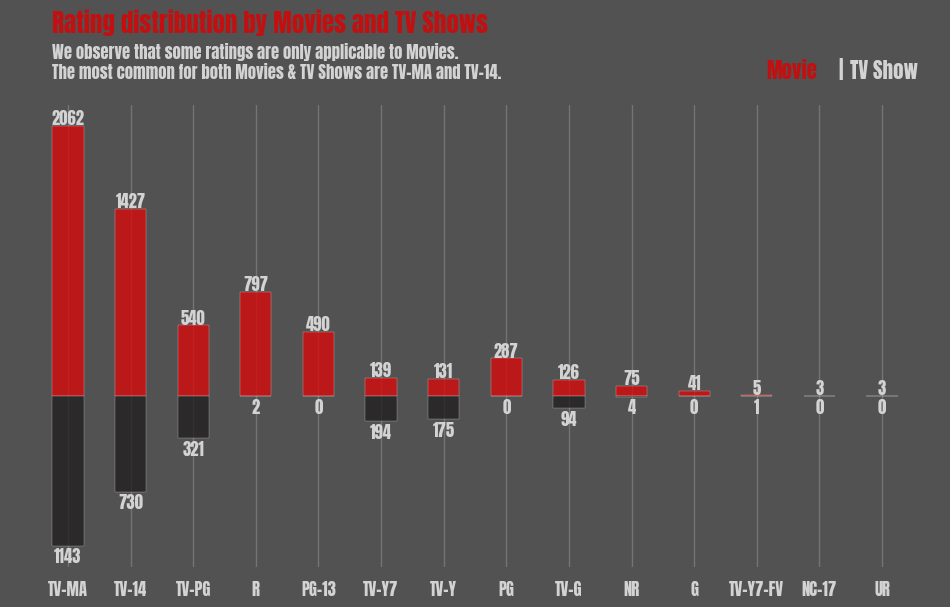

In [ ]:
# Plotting the bar chart for movie and tv show ratings_type
fig, ax = plt.subplots(1,1, figsize=(12,6))
fig.patch.set_facecolor('#525252')
ax.patch.set_facecolor('#525252')
ax.bar(ratings_type_movie.index, ratings_type_movie, width=0.5, color='#D60A0B', alpha=0.8, label='Movie', linewidth=0.2)
ax.bar(ratings_type_tvshow.index, ratings_type_tvshow_neg, width=0.5, color='#221F1F', alpha=0.8, label='TV Show', linewidth=0.2)
#ax.set_ylim(-3,3)
ax.grid(True, alpha=0.2)

# Annotations
for i in ratings_type_tvshow.index:
  ax.annotate(f"{ratings_type_tvshow[i]}",
              xy=(i, ratings_type_tvshow_neg[i]-80),
              va='center', ha='center',
              font=mlt_font,color='#d3d3d3' )


for i in ratings_type_movie.index:
  ax.annotate(f"{ratings_type_movie[i]}",
              xy=(i, ratings_type_movie[i]+60),
              va='center', ha='center',
              font=mlt_font, color='#d3d3d3')


for s in ['top','left','right', 'bottom']:
  ax.spines[s].set_visible(False)

ax.set_xticklabels(ratings_type.columns, font=mlt_font, color='#d3d3d3')
ax.set_yticks([])

ax.legend().set_visible(False)
fig.text(0.16, 1, 'Rating distribution by Movies and TV Shows', fontsize=18, font=mlt_font, color='#C21010')
fig.text(0.16, 0.89,
         '''We observe that some ratings are only applicable to Movies.
The most common for both Movies & TV Shows are TV-MA and TV-14.
''',
fontweight='light', fontsize=12, font=mlt_font, color='#d3d3d3')

fig.text(0.755, 0.924, 'Movie', fontweight="bold", font=mlt_font, fontsize=15, color='#C21010')
fig.text(0.815,0.924,"|", fontweight="bold", font=mlt_font, fontsize=15, color='#d3d3d3')
fig.text(0.825,0.924,"TV Show", fontweight="bold", font=mlt_font, fontsize=15, color='#d3d3d3')

plt.show()

### Analysing the release year.

In [ ]:
data['type'].value_counts().index

Index(['Movie', 'TV Show'], dtype='object', name='type')

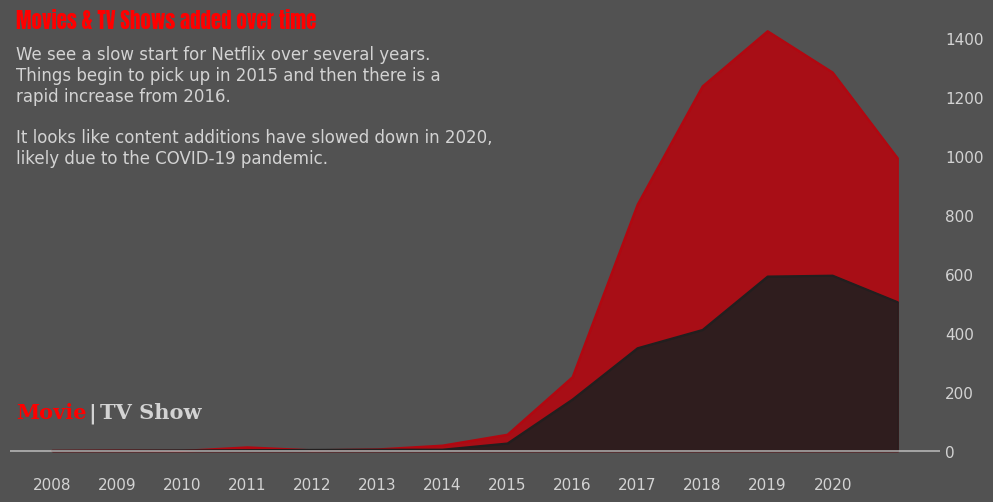

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
color=['#b20710', '#221f1f']
fig.patch.set_facecolor('#525252')
ax.patch.set_facecolor('#525252')

for i, mov_tv in enumerate(data['type'].value_counts().index):
  mov_tv_rel = data[data['type'] == mov_tv]['year_added'].value_counts().sort_index()
  ax.plot(mov_tv_rel.index, mov_tv_rel, color=color[i], label=mov_tv)
  ax.fill_between(mov_tv_rel.index, 0, mov_tv_rel, color=color[i], alpha=0.9)

ax.yaxis.tick_right()
ax.axhline(y=0, color='#d3d3d3', linewidth=1.3, alpha=0.7)

for s in ['top', 'right', 'bottom', 'left']:
  ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim = (2008, 2020)
plt.xticks(np.arange(2008, 2021, 1), color='#d3d3d3')
plt.yticks(color='#d3d3d3')
fig.text(0.13, 0.85, 'Movies & TV Shows added over time', fontsize=15, fontweight='bold', font=mlt_font, color='red')
fig.text(0.13, 0.59,
'''We see a slow start for Netflix over several years.
Things begin to pick up in 2015 and then there is a
rapid increase from 2016.

It looks like content additions have slowed down in 2020,
likely due to the COVID-19 pandemic.
'''

, fontsize=12, fontweight='light', color='#d3d3d3')


fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='red')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='#d3d3d3')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#d3d3d3')

ax.tick_params(axis=u'both', which=u'both',length=0, color='#d3d3d3')

plt.show()

### Month by month cummulative total of content added to netflix

In [ ]:
data['month_name'].value_counts()

,count
month_name,
July,827
December,812
September,769
April,763
October,760
August,754
March,741
January,737
June,728


In [ ]:
type_by_month = data.groupby('type')['month_name'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T
type_by_month

type,TV Show,Movie
month_name,,
April,214,763
August,236,754
December,265,812
February,180,562
January,192,737
July,262,827
June,236,728
March,213,741
May,193,632


In [ ]:
# Sorting the month_name in the order of the calendar months
months=['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

type_by_month.index = sorted(type_by_month.index, key=lambda x:months.index(x))
type_by_month

type,TV Show,Movie
January,214,763
February,236,754
March,265,812
April,180,562
May,192,737
June,262,827
July,236,728
August,213,741
September,193,632
October,207,705


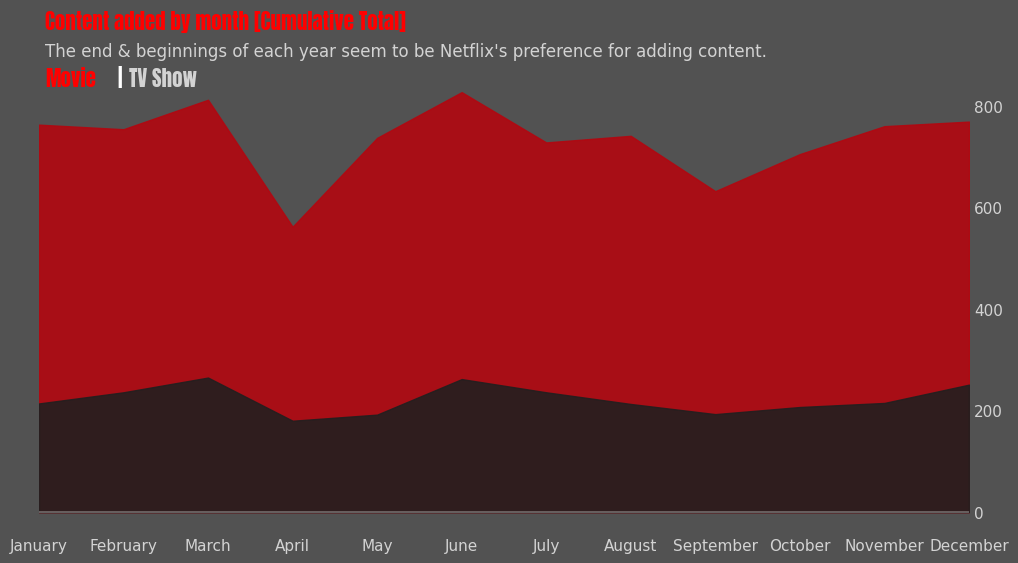

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
color = ['#B20710', '#221F1F']
fig.patch.set_facecolor('#525252')
ax.patch.set_facecolor('#525252')
for i,mov_tv in enumerate(data['type'].value_counts().index):
  mov_tv_rel = type_by_month[mov_tv]
  ax.fill_between(mov_tv_rel.index, 0, mov_tv_rel, color = color[i], label=mov_tv, alpha=0.9)


ax.yaxis.tick_right()
ax.axhline(y=0, color='#d3d3d3', linewidth=1.3, alpha=0.4)
plt.yticks(color='#d3d3d3')
for s in ['top', 'right', 'bottom', 'left']:
  ax.spines[s].set_visible(False)

ax.grid(False)
ax.set_xticklabels(type_by_month.index, rotation=0, color='#d3d3d3')
ax.margins(x=0) #remove white spaces next to margins

fig.text(0.13, 0.95, 'Content added by month [Cumulative Total]', fontsize=15, fontweight='bold', font=mlt_font, color='red')
fig.text(0.13, 0.905,
"The end & beginnings of each year seem to be Netflix's preference for adding content."

, fontsize=12, fontweight='light', color='#d3d3d3')



fig.text(0.13,0.855,"Movie", fontweight="bold", font=mlt_font, fontsize=15, color='red')
fig.text(0.19,0.855,"|", fontweight="bold", font=mlt_font, fontsize=15, color='white')
fig.text(0.2,0.855,"TV Show", fontweight="bold", font=mlt_font, fontsize=15, color='#d3d3d3')


ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()


In [ ]:
# plotting a heat map for release date to analyse the best month to release
yearly_data = data.groupby('year_added')['month_name'].value_counts().unstack().fillna(0)[months].T
yearly_data

year_added,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month_name,,,,,,,,,,,,,,
January,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,43.0,71.0,129.0,153.0,205.0,132.0
February,1.0,0.0,0.0,0.0,1.0,0.0,2.0,4.0,15.0,82.0,86.0,148.0,114.0,109.0
March,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,17.0,124.0,173.0,172.0,137.0,112.0
April,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,22.0,92.0,115.0,162.0,177.0,188.0
May,0.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,13.0,86.0,97.0,139.0,157.0,132.0
June,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,18.0,94.0,78.0,168.0,156.0,207.0
July,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,28.0,79.0,152.0,157.0,146.0,257.0
August,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,33.0,115.0,164.0,131.0,129.0,178.0
September,0.0,0.0,0.0,1.0,0.0,2.0,1.0,7.0,47.0,113.0,124.0,123.0,168.0,183.0


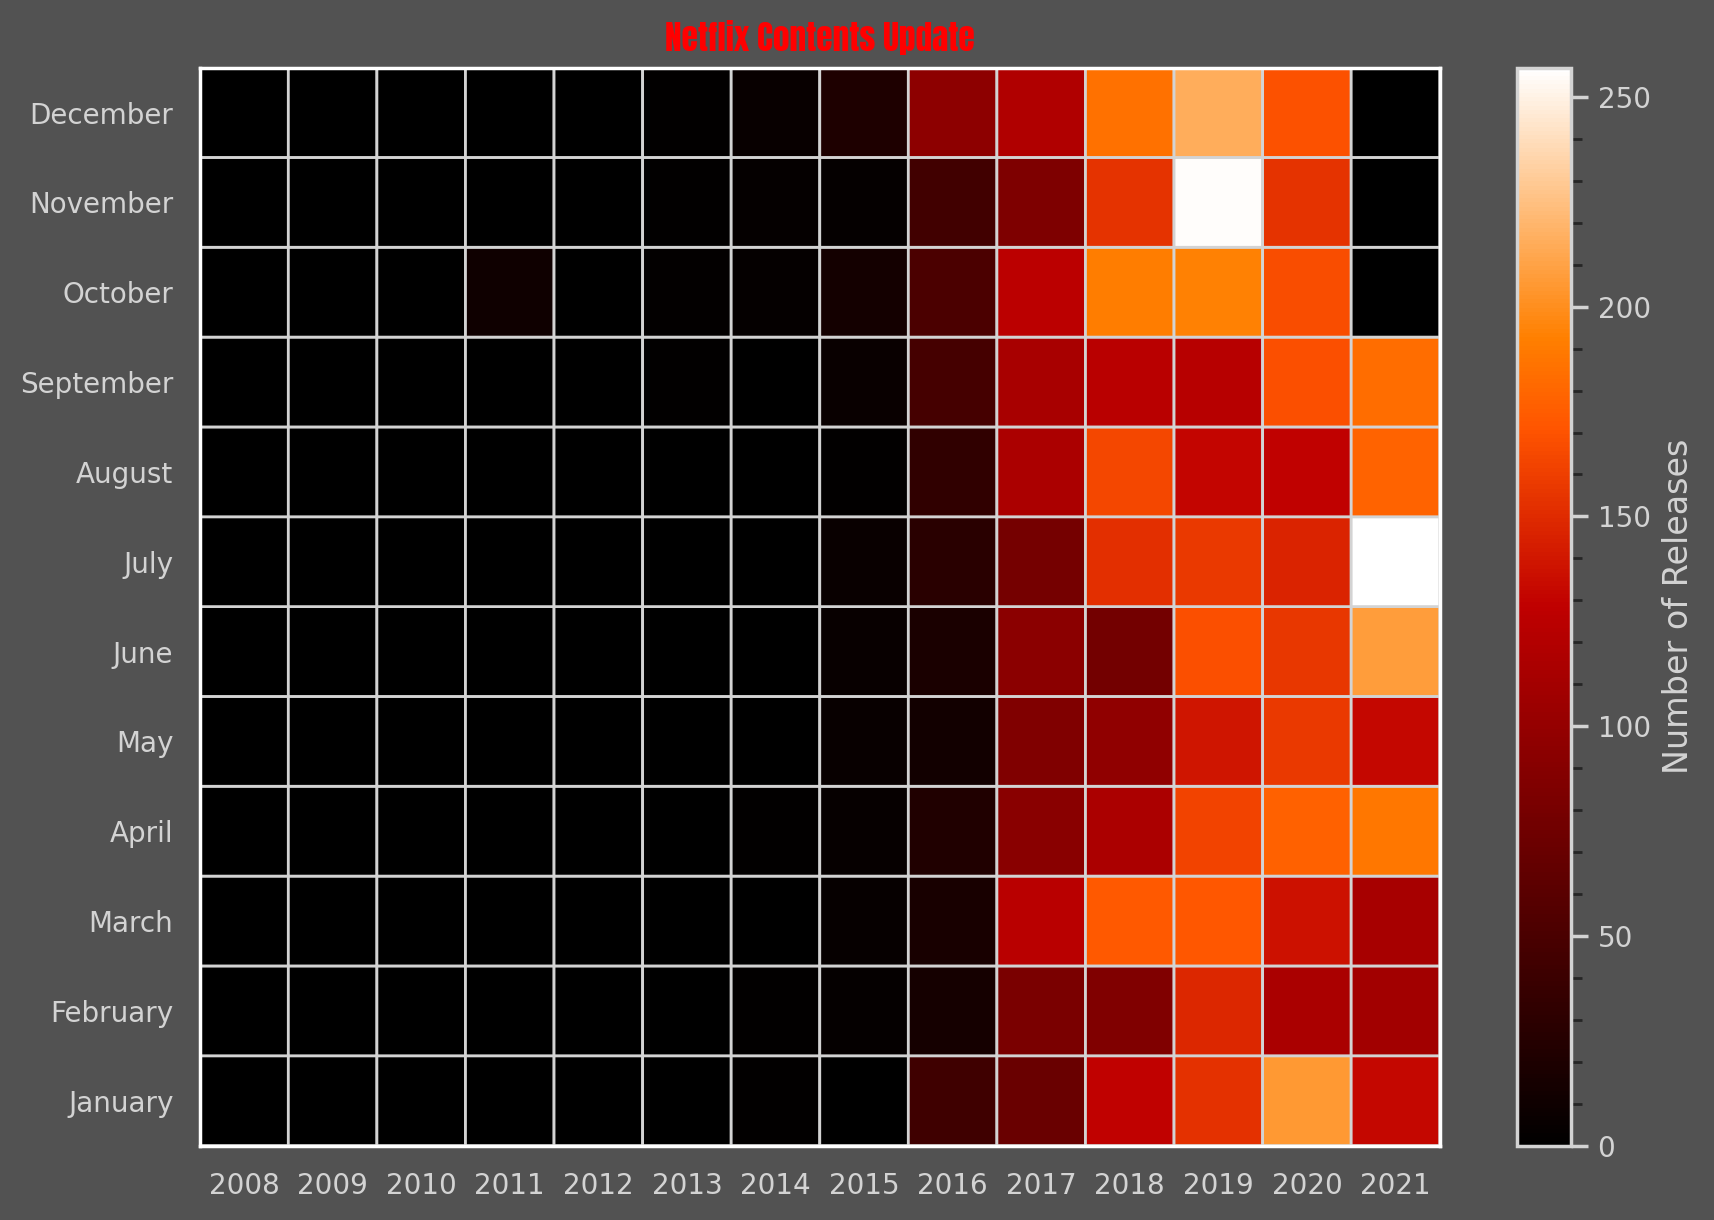

In [ ]:
plt.figure(figsize=(10,7), dpi=200, facecolor=('#525252'))
plt.pcolor(yearly_data, cmap='gist_heat', edgecolors='#d3d3d3', linewidths=1,facecolor='#525252')

plt.xticks(np.arange(0.5,len(yearly_data.columns),1), yearly_data.columns, fontsize=10, color='#d3d3d3')
plt.yticks(np.arange(0.5, len(yearly_data.index),1),yearly_data.index, fontsize=10,color='#d3d3d3')
plt.title('Netflix Contents Update', fontsize=20, font=mlt_font, position=(0.50, 1.0), color='red')
cbar=plt.colorbar()
cbar.set_label('Number of Releases', color='#d3d3d3')
cbar.ax.tick_params(labelsize=10, color='#d3d3d3')
cbar.outline.set_edgecolor('#d3d3d3')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#d3d3d3')
cbar.ax.minorticks_on()

plt.show()

In [ ]:
type_by_month2 = type_by_month
type_by_month2['value'] = type_by_month2['Movie'] + type_by_month2['TV Show']
type_by_month2 = type_by_month2.reset_index()
type_by_month2

type,index,TV Show,Movie,value
0,January,214,763,977
1,February,236,754,990
2,March,265,812,1077
3,April,180,562,742
4,May,192,737,929
5,June,262,827,1089
6,July,236,728,964
7,August,213,741,954
8,September,193,632,825
9,October,207,705,912


In [ ]:
data_by_month = type_by_month2.sort_values(by='index', ascending=False)
data_by_month

type,index,TV Show,Movie,value
8,September,193,632,825
9,October,207,705,912
10,November,215,760,975
4,May,192,737,929
2,March,265,812,1077
5,June,262,827,1089
6,July,236,728,964
0,January,214,763,977
1,February,236,754,990
11,December,251,769,1020


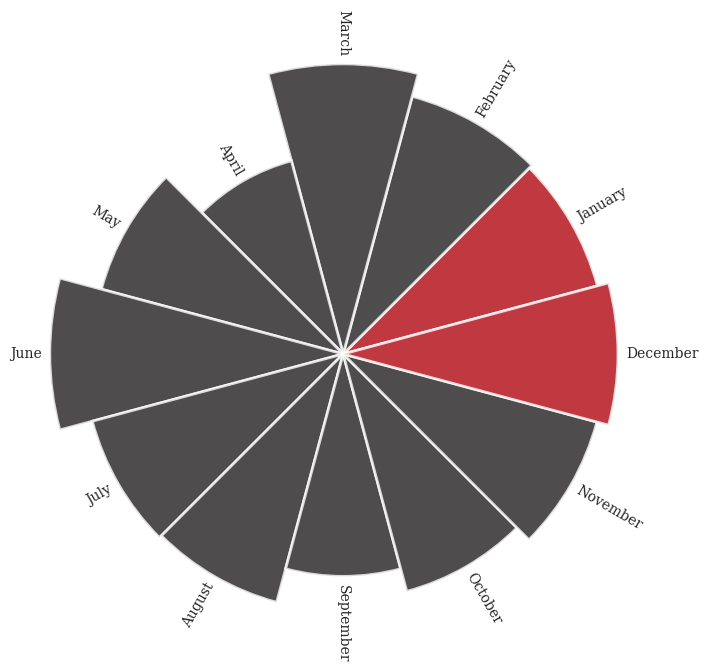

In [ ]:
color_map = ['#221F1F' for _ in range(12)]
color_map[0] = color_map[11] = '#B20710' #color highlight

# initializing the figure
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
plt.axis('off')
fig.patch.set_facecolor('#525252')
ax.patch.set_facecolor('#525252')

#constants = parameters controlling the plot layout
upperlimit = 30
lowerlimit = 1
labelpadding = 30

#compute max and min in the dataset
max = type_by_month2['value'].max()
min = type_by_month2['value'].min()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerlimit) / max
heights = slope * type_by_month2.value + lowerlimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(type_by_month2.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(type_by_month2.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerlimit,
    linewidth=2,
    edgecolor="white",
    color=color_map,alpha=0.8
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, type_by_month2["index"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle,
        y=lowerlimit + bar.get_height() + labelpadding,
        s=label,
        ha=alignment, fontsize=10,fontfamily='serif',
        va='center',
        rotation=rotation,
        rotation_mode="anchor")

### Plotting the number of movies and tv shows based on genre

In [ ]:
def find_missing_index_numbers(df):
    """Finds missing index numbers in a DataFrame."""

    # Create a set of all expected index numbers
    expected_index = set(range(df.index.min(), df.index.max() + 1))

    # Find the difference between the expected and actual index numbers
    missing_index = expected_index - set(df.index)

    return missing_index

In [ ]:
missing_idx = find_missing_index_numbers(data)
print(missing_idx)

{5794, 5989, 5541, 7847, 6795, 6827, 7406, 7312, 7537, 6066, 5813, 6806, 6901, 7254, 8182, 7196, 6174}


In [ ]:
data = data.reset_index()

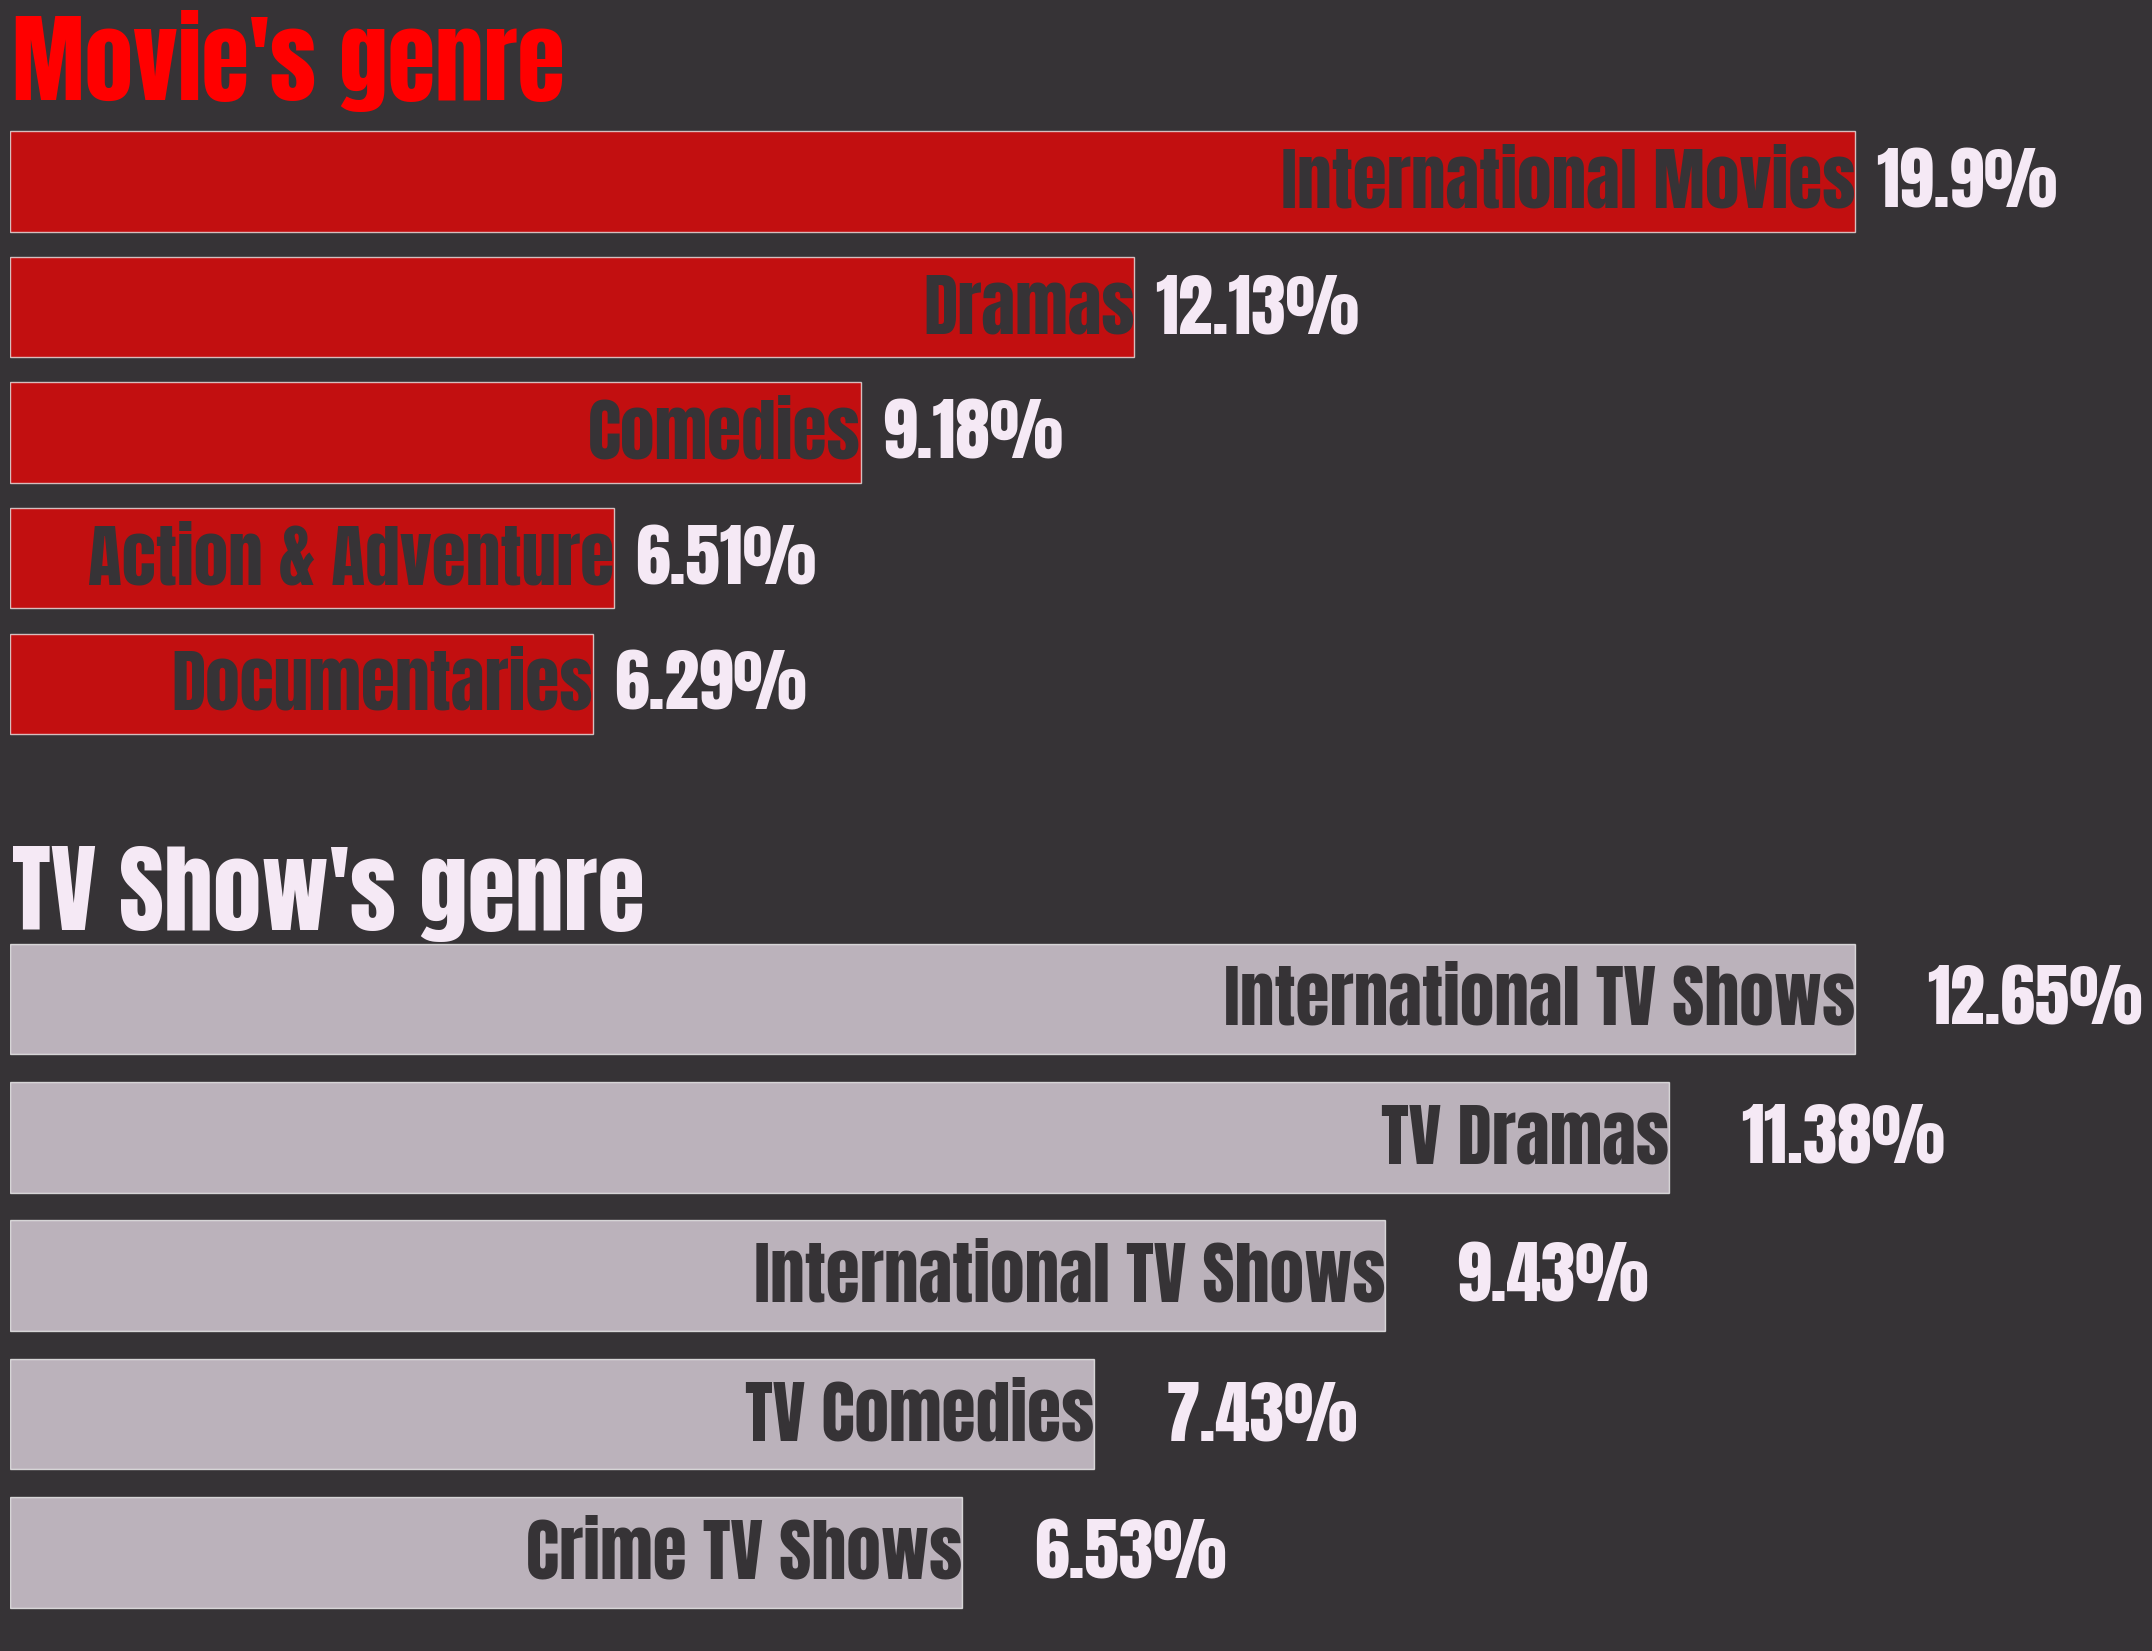

In [ ]:
movie_genre = []
TV_genre = []

for i in range(len(data)):
  genre = data.loc[i,'listed_in'].split(",")
  if data.loc[i,'type'] == 'TV Show':
    for j in genre:
      TV_genre.append(j)
  else:
    for j in genre:
      movie_genre.append(j)

movie_genre = Counter(movie_genre)
TV_genre = Counter(TV_genre)

movie_genre = pd.DataFrame(movie_genre.items())
TV_genre = pd.DataFrame(TV_genre.items())

movie_genre.columns = ['genre','movie_count']
TV_genre.columns = ['genre','tv_count']

movie_genre = movie_genre.sort_values(by= 'movie_count')
TV_genre = TV_genre.sort_values(by= 'tv_count')

movie_genre['per'] = round(movie_genre['movie_count'] / sum(movie_genre['movie_count']) * 100,2)
TV_genre['per'] = round(TV_genre['tv_count'] / sum(TV_genre['tv_count']) * 100,2)

movie_genre_d = movie_genre.sort_values(by='per', ascending=False)
TV_genre_d = TV_genre.sort_values(by= 'per', ascending=False)

movie_genre_top5 = movie_genre_d[:5][::-1].reset_index()
TV_genre_top5 = TV_genre_d[:5][::-1].reset_index()

fig, ax = plt.subplots(figsize=(25,20),facecolor="#363336")
ax.patch.set_facecolor('#363336')
spec = gridspec.GridSpec(ncols=21, nrows=23, figure=fig)
ax1 = fig.add_subplot(spec[:10, :],facecolor="#363336")
ax2 = fig.add_subplot(spec[12:,:],facecolor="#363336")

ax1.barh(y=movie_genre_d['genre'][:5][::-1], width = movie_genre_d['movie_count'][:5][::-1], color = 'red',alpha=0.7)
for i in range(5):
    ax1.text(s=movie_genre_top5.loc[i, 'genre'], x= movie_genre_top5.loc[i,'movie_count'],y =i-0, va='center', ha='right',font=mlt_font, color = "#363336",fontsize=50)
    ax1.text(s=f"{movie_genre_top5.loc[i,'per']}%", x= movie_genre_top5.loc[i,'movie_count']+30,y =i-0, va='center', ha='left',font=mlt_font, color = '#F5E9F5',fontsize=50)
ax1.set_yticks([])
ax1.set_xticks([])

ax2.barh(y=TV_genre['genre'][-5:], width = TV_genre['tv_count'][-5:],color = '#F5E9F5',alpha=0.7)
for i in range(5):
    ax2.text(s=TV_genre_top5.loc[i,'genre'], x= TV_genre_top5.loc[i,'tv_count'],y =i-0, va='center', ha='right',font=mlt_font, color = "#363336",fontsize=50)
    ax2.text(s=f"{TV_genre_top5.loc[i,'per']}%", x= TV_genre_top5.loc[i,'tv_count']+30,y =i-0, va='center', ha='left',font=mlt_font, color = '#F5E9F5',fontsize=50)
ax2.set_yticks([])
ax2.set_xticks([])

ax.set_xticks([])
ax.set_yticks([])

direct = ['right', 'left','bottom','top']
for di in direct:
    ax1.spines[di].set_visible(False)
    ax2.spines[di].set_visible(False)
    ax.spines[di].set_visible(False)

plt.text(s= "Movie's genre", x=1, y= 10.5, font=mlt_font, fontsize=70, color = 'red')
plt.text(s= "TV Show's genre", x=1, y= 4.5, font=mlt_font, fontsize=70, color = '#F5E9F5')

plt.show()

In [ ]:
movie_genre

,genre,movie_count,per
36,Sports Movies,1,0.01
34,LGBTQ Movies,1,0.01
33,Romantic Movies,3,0.02
35,Stand-Up Comedy,9,0.07
30,Cult Movies,12,0.09
20,Sci-Fi & Fantasy,13,0.10
32,Music & Musicals,18,0.14
31,Independent Movies,20,0.15
28,Anime Features,21,0.16
23,Children & Family Movies,36,0.27


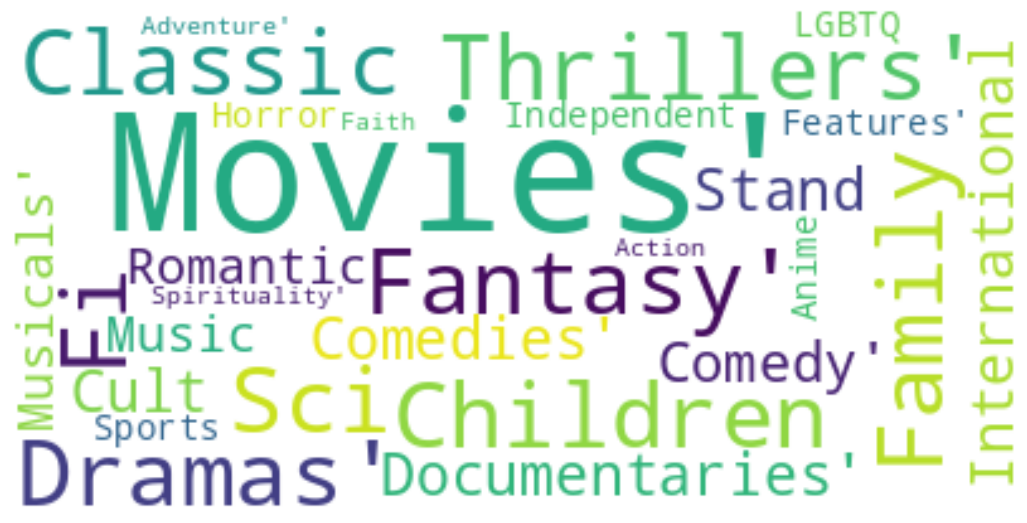

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = list(set(movie_genre['genre']))
plt.rcParams['figure.figsize'] = (13,13)

#mask = np.array(Image.open('../input/masks/star.png'))
wordcloud = WordCloud(max_words=1000000, background_color = 'white').generate(str(text))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

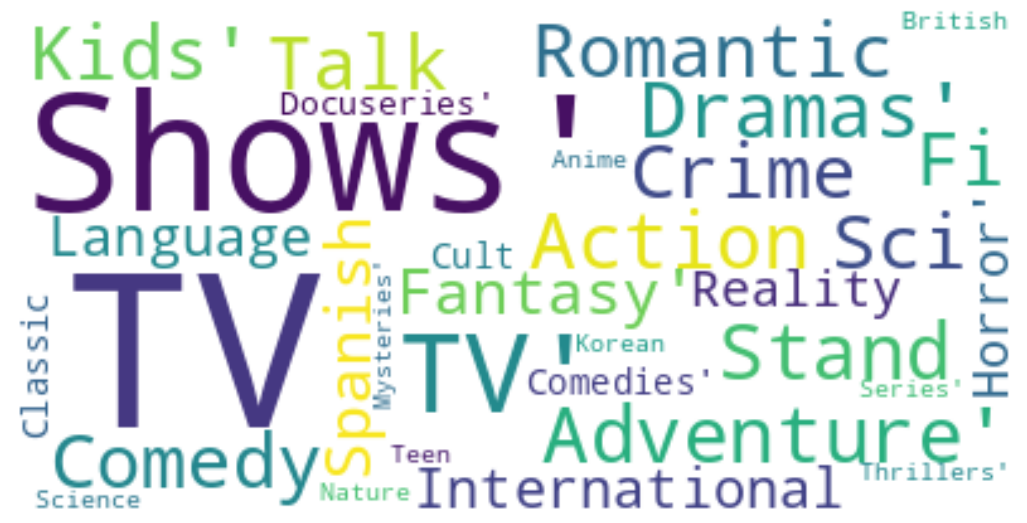

In [ ]:
text_tv = list(set(TV_genre['genre']))
plt.rcParams['figure.figsize'] = (13,13)

#mask = np.array(Image.open('../input/masks/star.png'))
wordcloud = WordCloud(max_words=1000000, background_color = 'white').generate(str(text_tv))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
genre_dict = pd.Series(movie_genre.genre.values, index=movie_genre.movie_count).to_dict()
genre_dict

{1: 'LGBTQ Movies',
 3: 'Romantic Movies',
 9: ' Stand-Up Comedy',
 12: 'Cult Movies',
 13: 'Sci-Fi & Fantasy',
 18: 'Music & Musicals',
 20: 'Independent Movies',
 21: 'Anime Features',
 36: ' Classic Movies',
 40: ' Documentaries',
 50: ' Anime Features',
 53: 'Movies',
 59: ' Cult Movies',
 65: ' Faith & Spirituality',
 80: 'Classic Movies',
 82: ' Horror Movies',
 101: ' LGBTQ Movies',
 128: 'International Movies',
 218: ' Sports Movies',
 230: ' Sci-Fi & Fantasy',
 275: 'Horror Movies',
 334: 'Stand-Up Comedy',
 357: ' Music & Musicals',
 464: ' Comedies',
 512: ' Thrillers',
 605: 'Children & Family Movies',
 613: ' Romantic Movies',
 736: ' Independent Movies',
 827: ' Dramas',
 829: 'Documentaries',
 859: 'Action & Adventure',
 1210: 'Comedies',
 1599: 'Dramas',
 2624: ' International Movies'}

Text(0.5, 1.0, 'Genres')

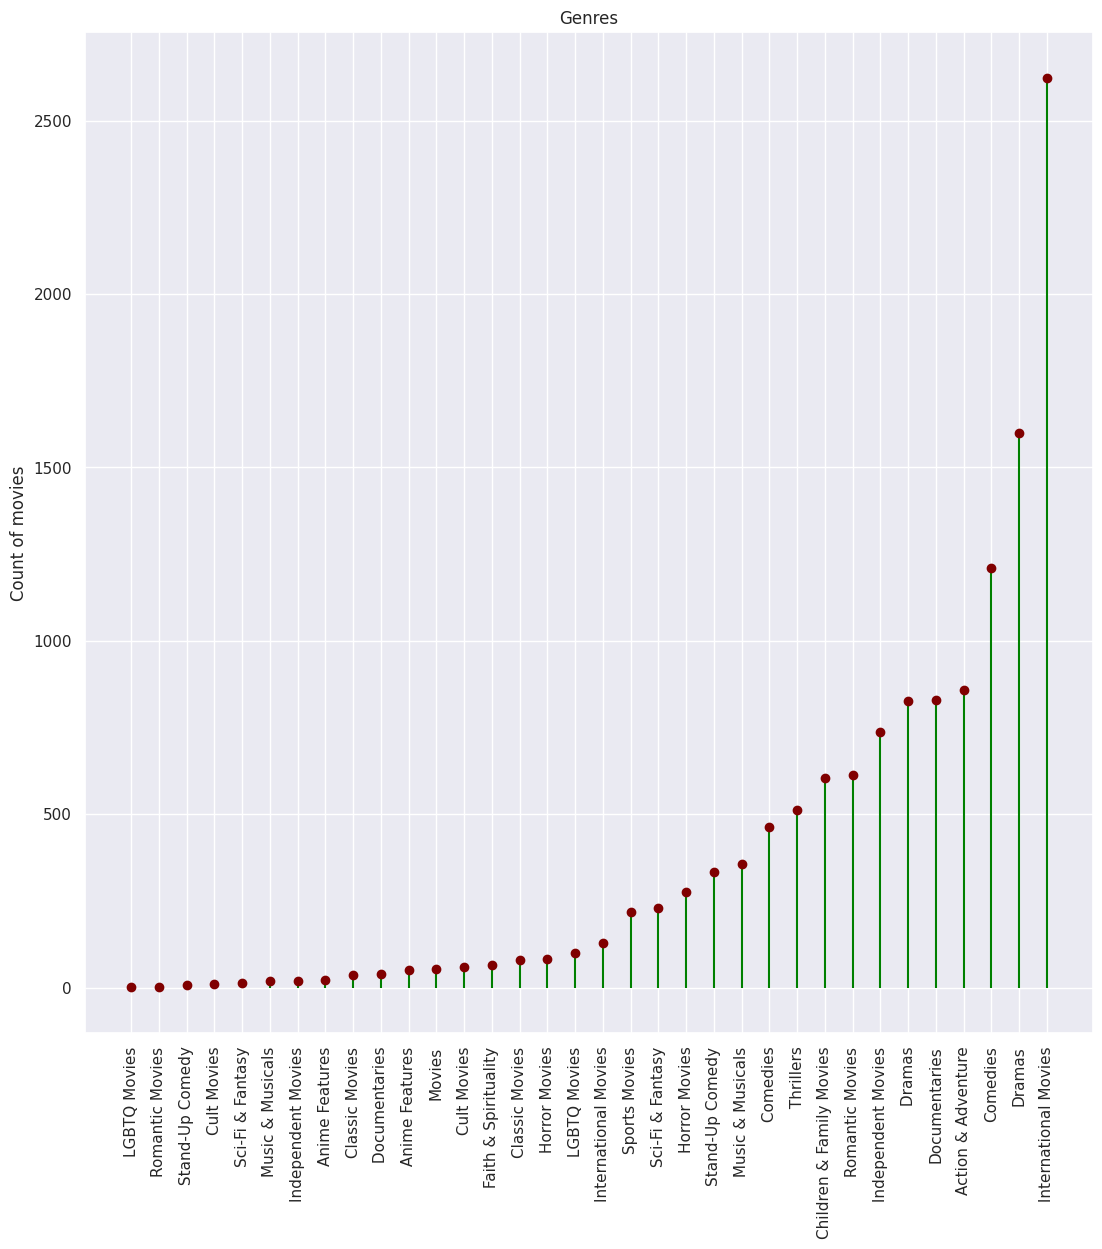

<Figure size 1000x1000 with 0 Axes>

In [ ]:
fig, ax = plt.subplots()
fig = plt.figure(figsize=(10,10))
x = list(genre_dict.values())
y = list(genre_dict.keys())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x, y, 'o', color='maroon')
ax.set_xticklabels(x, rotation=90)
ax.set_ylabel('Count of movies')
ax.set_title('Genres')


In [ ]:
data.columns

Index(['index', 'show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description', 'month_added', 'month_name', 'year_added',
       'country_count', 'first_country', 'rating_ages', 'genre', 'count'],
      dtype='object')

In [ ]:
data_ages = data.groupby('first_country')['count'].sum().sort_values(ascending=False).reset_index()
data_ages

,first_country,count
0,United States,4031
1,India,1008
2,United Kingdom,627
3,Canada,271
4,Japan,257
...,...,...
81,Namibia,1
82,Somalia,1
83,Slovenia,1
84,Paraguay,1


In [ ]:
ages_heatmap = pd.crosstab(data['first_country'],data['rating_ages'],normalize = 'index').T
ages_heatmap

first_country,,Argentina,Australia,Austria,Bangladesh,Belarus,Belgium,Brazil,Bulgaria,Cambodia,...,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Venezuela,Vietnam,West Germany,Zimbabwe
rating_ages,,,,,,,,,,,,,,,,,,,,,
Adults,0.5,0.763158,0.460870,0.777778,0.333333,0.0,0.777778,0.678571,1.0,1.0,...,0.621622,0.5,0.285714,0.523126,0.457703,0.555556,0.5,0.428571,1.0,0.0
Kids,0.0,0.052632,0.147826,0.000000,0.000000,1.0,0.000000,0.071429,0.0,0.0,...,0.009009,0.0,0.047619,0.081340,0.084346,0.222222,0.0,0.142857,0.0,1.0
Older Kids,0.0,0.052632,0.234783,0.111111,0.333333,0.0,0.055556,0.107143,0.0,0.0,...,0.081081,0.0,0.190476,0.177033,0.200695,0.222222,0.0,0.000000,0.0,0.0
Teens,0.5,0.131579,0.156522,0.111111,0.333333,0.0,0.166667,0.142857,0.0,0.0,...,0.288288,0.5,0.476190,0.218501,0.257256,0.000000,0.5,0.428571,0.0,0.0


In [ ]:
top_10_countries = data.groupby(['first_country']).first_country.value_counts().nlargest(10)

In [ ]:
ages_heatmap

first_country,,Argentina,Australia,Austria,Bangladesh,Belarus,Belgium,Brazil,Bulgaria,Cambodia,...,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Venezuela,Vietnam,West Germany,Zimbabwe
rating_ages,,,,,,,,,,,,,,,,,,,,,
Adults,0.5,0.763158,0.460870,0.777778,0.333333,0.0,0.777778,0.678571,1.0,1.0,...,0.621622,0.5,0.285714,0.523126,0.457703,0.555556,0.5,0.428571,1.0,0.0
Kids,0.0,0.052632,0.147826,0.000000,0.000000,1.0,0.000000,0.071429,0.0,0.0,...,0.009009,0.0,0.047619,0.081340,0.084346,0.222222,0.0,0.142857,0.0,1.0
Older Kids,0.0,0.052632,0.234783,0.111111,0.333333,0.0,0.055556,0.107143,0.0,0.0,...,0.081081,0.0,0.190476,0.177033,0.200695,0.222222,0.0,0.000000,0.0,0.0
Teens,0.5,0.131579,0.156522,0.111111,0.333333,0.0,0.166667,0.142857,0.0,0.0,...,0.288288,0.5,0.476190,0.218501,0.257256,0.000000,0.5,0.428571,0.0,0.0


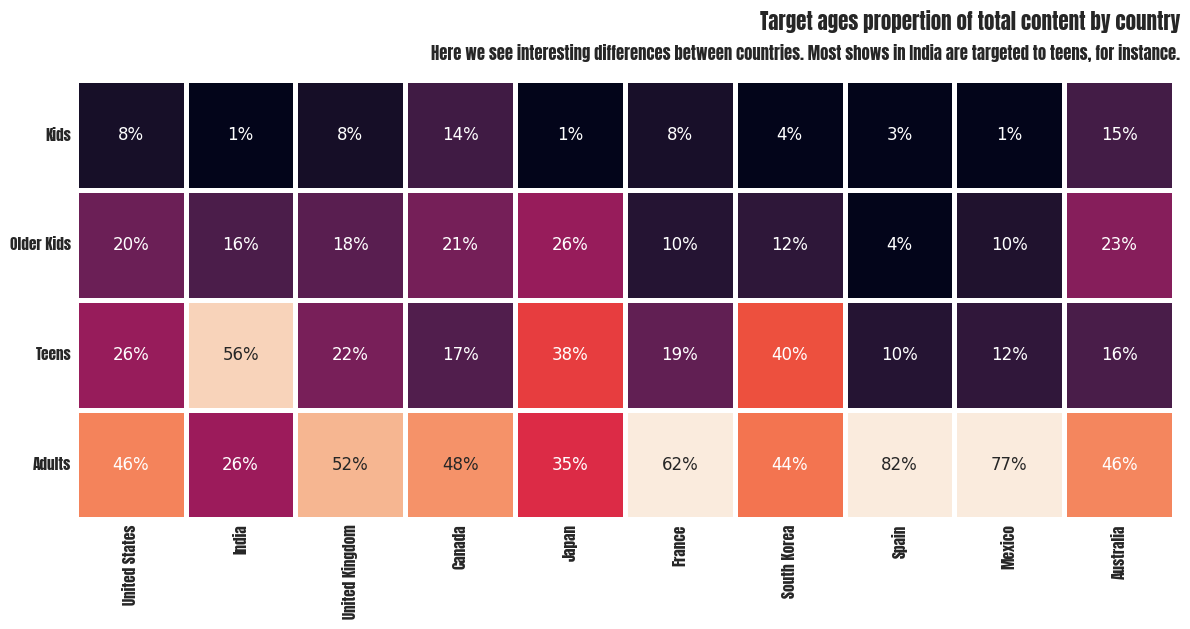

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,12))
#country_order2 = ['USA', 'India', 'UK', 'Canada', 'Japan', 'France', 'S. Korea', 'Spain','Mexico', 'Turkey']
country_order2 = top_10_countries.index.tolist()
age_order = ['Kids','Older Kids','Teens','Adults']

sns.heatmap(ages_heatmap.loc[age_order,country_order2],square=True,linewidth=2.5,cbar=False,annot=True,fmt='1.0%',vmax=0.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
ax.spines['top'].set_visible(True)

fig.text(0.99,0.725,'Target ages propertion of total content by country',fontweight='bold',font=mlt_font,fontsize=15, ha='right')
fig.text(0.99, 0.7, 'Here we see interesting differences between countries. Most shows in India are targeted to teens, for instance.',ha='right', fontsize=12,font=mlt_font)

ax.set_yticklabels(ax.get_yticklabels(), font=mlt_font, rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(),font=mlt_font, rotation=90, fontsize=11)

ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

Most popular actor

In [ ]:
each_actor = []
countries_actor = list(data['country'].value_counts()[:15].index)
countries_actor

['United States',
 'India',
 'United Kingdom',
 'Japan',
 'South Korea',
 'Canada',
 'Spain',
 'France',
 'Mexico',
 'Egypt',
 'Turkey',
 'Nigeria',
 'Australia',
 'Taiwan',
 'Indonesia']

In [ ]:
for countries in countries_actor:
  tmp = data[data['country'] == countries].copy()
  tmp = tmp.reset_index(drop=True)
  actors = []
  for i in range(len(tmp)):
    if tmp.loc[i,'cast'] == 'NaN' or type(tmp.loc[i,'cast']) != str:
      continue
    elif tmp.loc[i,'cast'] == 'Data not Available':
      continue
    elif ',' not in tmp.loc[i, 'cast']:
      actors.append(tmp.loc[i, 'cast'])
    else:
      for j in tmp.loc[i,'cast'].split(','):
        actors.append(j)

  print(countries, ":", sorted(Counter(actors).items(),key=lambda x:x[1], reverse=True)[0])

  each_actor.append(sorted(Counter(actors).items(), key=lambda x:x[1], reverse=True)[0][0])

countries_actor[0] = 'United States of America'

United States : (' Rupa Bhimani', 25)
India : (' Anupam Kher', 36)
United Kingdom : (' Eric Idle', 10)
Japan : (' Takahiro Sakurai', 28)
South Korea : (' Sung Dong-il', 6)
Canada : (' John Paul Tremblay', 11)
Spain : ('Mario Casas', 6)
France : (' Wille Lindberg', 5)
Mexico : (' Humberto Busto', 5)
Egypt : (' Hassan Hosny', 13)
Turkey : (' Cezmi Baskın', 9)
Nigeria : (' Blossom Chukwujekwu', 10)
Australia : (' Magda Szubanski', 5)
Taiwan : (' Amanda Chou', 6)
Indonesia : (' Maudy Koesnaedi', 7)


NameError: name 'world' is not defined

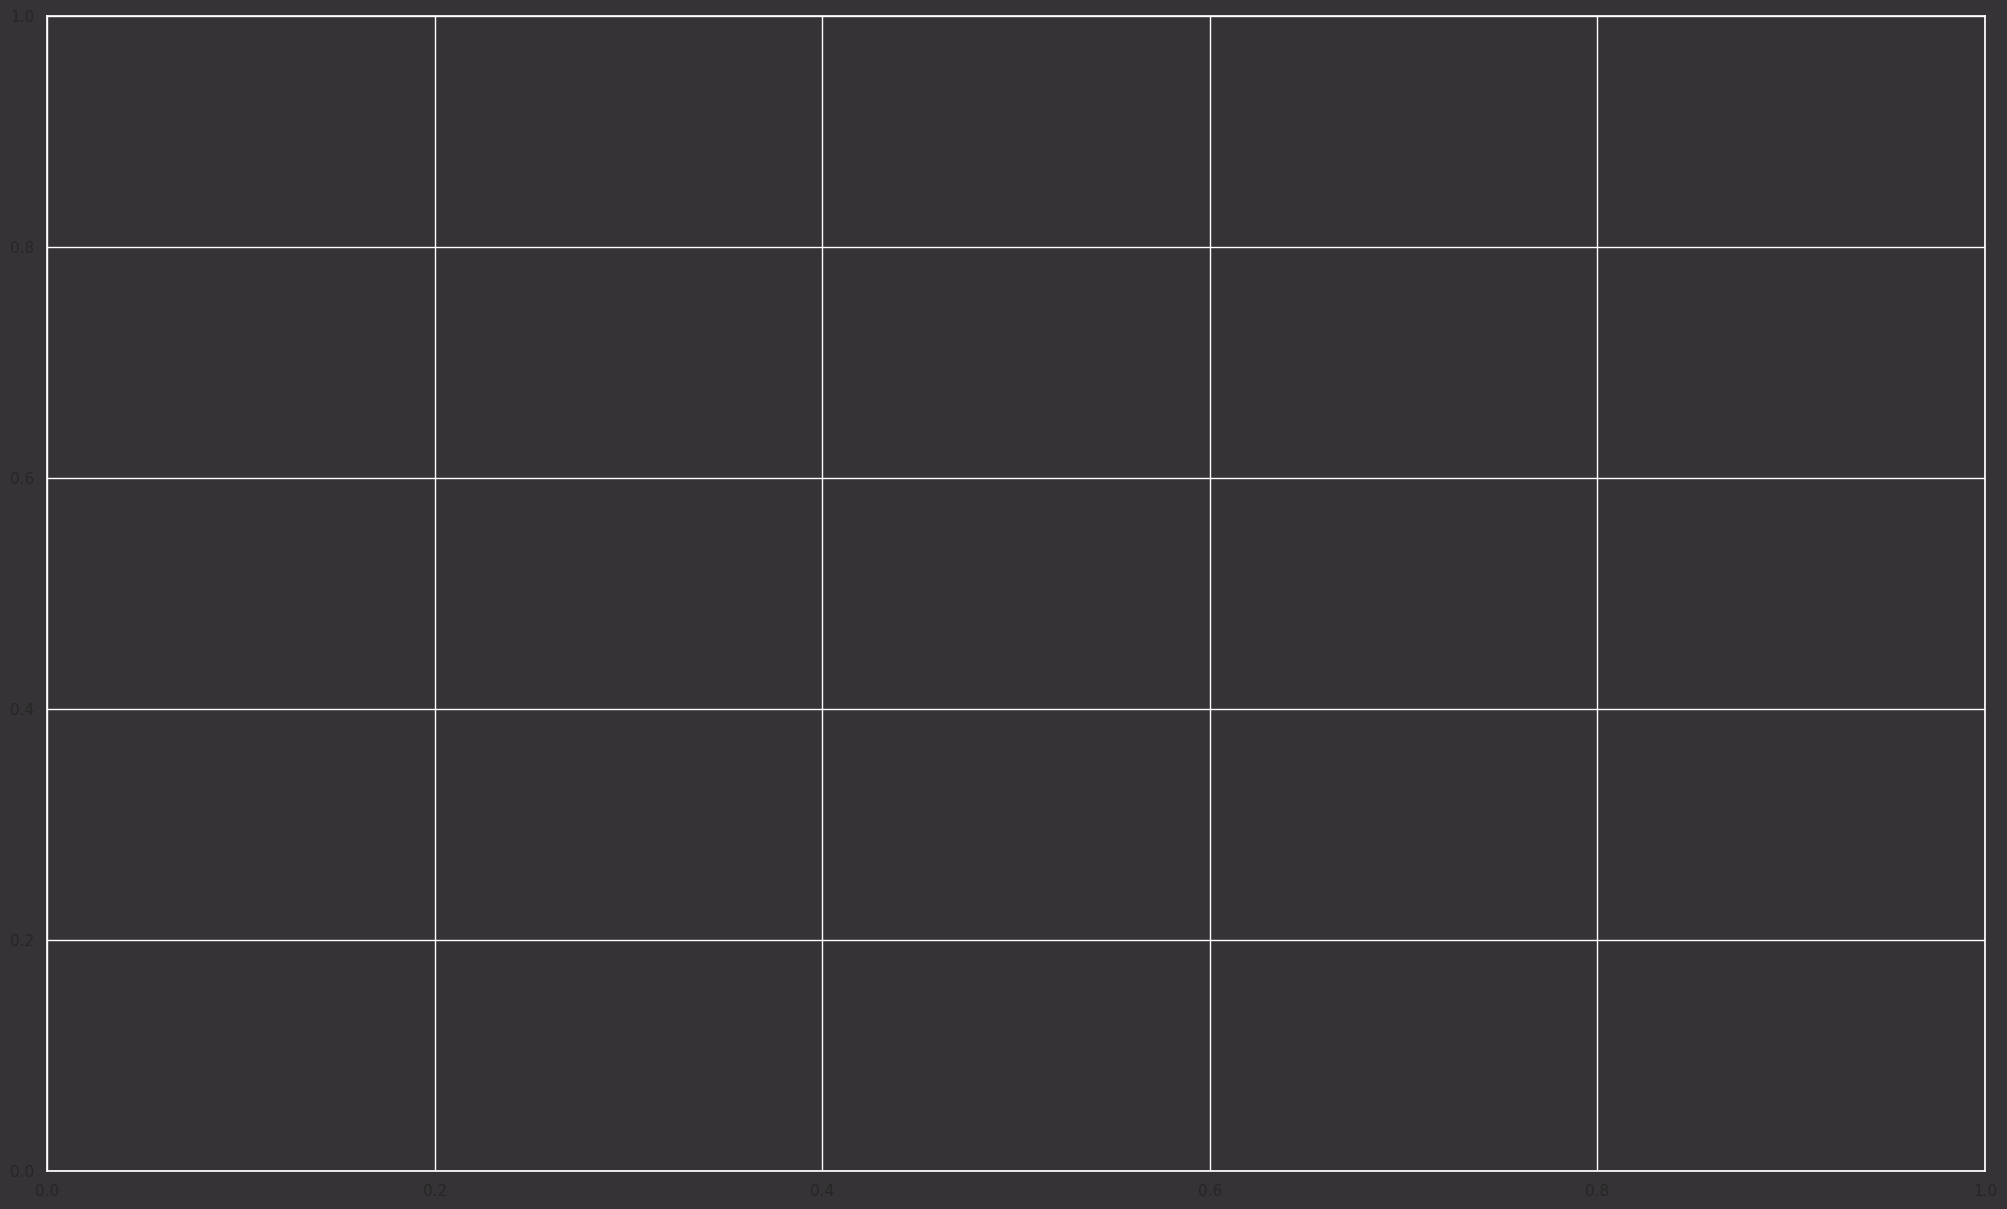

In [ ]:
fig, ax = plt.subplots(figsize=(25,15),facecolor="#363336")
ax.patch.set_facecolor('#363336')
world.plot(ax=ax, color ="#363336",edgecolor='black')
world2.plot(column='count',ax=ax, cmap='OrRd', scheme='quantiles', edgecolor='black')
plt.text(s="The actor who appeared the most", x=-200 ,y=110, font=mlt_font,color='#F5E9F5', va="center",ha="left",fontsize=30)
plt.text(s="Netflix", x=135 ,y=110, font=mlt_font,color='red', va="center",ha="left",fontsize=80)

plt.axis('off')

for i in range(15):
    x,y = str(world[world['name'] == countries_actor[i]]['geometry'].centroid).split('(')[1].split(')')[0].split(' ')
    x,y = float(x),float(y)
    if i == 3:
        y+=5
    if i == 4:
        y-=5
    if i == 7:
        y+=5
    plt.text(s=f"{each_actor[i]}", x=x ,y=y, font=mlt_font,color='#F5E9F5', va="center",ha="center",fontsize=25)

plt.show()

Country, cast, director

In [ ]:
top_20_country_data = data['country'].value_counts().reset_index()[:20]

country_plot = go.Bar(x=top_20_country_data['country'],
                      y=top_20_country_data['count'],
                      marker = dict(color='red', line=dict(color='rgb(0,0,0)', width=1.5)))
layout = go.Layout(template='plotly_dark', title = "Top 20 Countries with most content", xaxis = dict(title='Countries'), yaxis=dict(title='Count'))
fig = go.Figure(data=[country_plot], layout=layout)
fig.show()

In [ ]:
top_10_dir_ind = data[data['type'] == 'Movie']

top_10_dir_ind = top_10_dir_ind[top_10_dir_ind['country'] == 'India']

categories = ', '.join(top_10_dir_ind['director'].fillna("")).split(', ')
counter_list = Counter(categories).most_common(11)
counter_list

[('Data not Available', 12),
 ('David Dhawan', 9),
 ('Anurag Kashyap', 8),
 ('Dibakar Banerjee', 7),
 ('Ram Gopal Varma', 7),
 ('Rajkumar Santoshi', 6),
 ('Imtiaz Ali', 6),
 ('Anees Bazmee', 6),
 ('Karan Johar', 6),
 ('Zoya Akhtar', 6),
 ('Sooraj R. Barjatya', 6)]

In [ ]:
from collections import Counter
# All rows where type=movie
dir_ind_data = data[data['type'] == 'Movie']
# Rows where type= movie and country India
dir_ind_data = dir_ind_data[dir_ind_data['country'] == 'India']

ind_mov_directors = ', '.join(dir_ind_data['director'].fillna("")).split(', ')
top_11_dirs = Counter(ind_mov_directors).most_common(11)
top_11_dirs = [_ for _ in top_11_dirs if _[0] != '']
labels = [_[0] for _ in top_11_dirs][::-1]
values = [_[1] for _ in top_11_dirs][::-1]

dir_plot = go.Bar(x = labels, y = values, marker = dict(color='red', line = dict(color='rgb(0,0,0)', width=1.5)))
layout = go.Layout(template='plotly_dark', title='Top 10 movie directors from India', xaxis=dict(title='Directors'), yaxis=dict(title='Count'))
fig = go.Figure(data=[dir_plot], layout=layout)
fig.show()

In [ ]:
# All rows where type=movie
dir_us_data = data[data['type'] == 'Movie']
# Rows where type= movie and country India
dir_us_data = dir_us_data[dir_us_data['country'] == 'United States']

us_mov_directors = ', '.join(dir_us_data['director'].fillna("")).split(', ')
top_11_dirs = Counter(us_mov_directors).most_common(11)
top_11_dirs = [_ for _ in top_11_dirs if _[0] != '']
labels = [_[0] for _ in top_11_dirs][::-1]
values = [_[1] for _ in top_11_dirs][::-1]

dir_plot = go.Bar(x = labels, y = values, marker = dict(color='red', line = dict(color='rgb(0,0,0)', width=1.5)))
layout = go.Layout(template='plotly_dark', title='Top 10 movie directors from USA', xaxis=dict(title='Directors'), yaxis=dict(title='Count'))
fig = go.Figure(data=[dir_plot], layout=layout)
fig.show()

In [ ]:
us_mov_directors = ', '.join(dir_us_data['director'].fillna("")).split(', ')
Counter(us_mov_directors).most_common(11)

[('Data not Available', 116),
 ('Rajiv Chilaka', 17),
 ('Suhas Kadav', 15),
 ('Jay Karas', 15),
 ('Marcus Raboy', 15),
 ('Jay Chapman', 12),
 ('Shannon Hartman', 9),
 ('Troy Miller', 8),
 ('Martin Scorsese', 8),
 ('Lance Bangs', 8),
 ('Prakash Satam', 7)]

In [ ]:
# All rows where type=movie
actor_ind_data = data[data['type'] == 'Movie']
# Rows where type= movie and country India
actor_ind_data = actor_ind_data[actor_ind_data['country'] == 'India']

ind_mov_actors = ', '.join(actor_ind_data['cast'].fillna("")).split(', ')
top_11_actors = Counter(ind_mov_actors).most_common(11)
top_11_actors = [_ for _ in top_11_actors if _[0] != '']
labels = [_[0] for _ in top_11_actors][::-1]
values = [_[1] for _ in top_11_actors][::-1]

dir_plot = go.Bar(x = labels, y = values, marker = dict(color='red', line = dict(color='rgb(0,0,0)', width=1.5)))
layout = go.Layout(template='plotly_dark', title='Top 10 movie Actors from India', xaxis=dict(title='Directors'), yaxis=dict(title='Count'))
fig = go.Figure(data=[dir_plot], layout=layout)
fig.show()

In [ ]:
# All rows where type=movie
actor_us_data = data[data['type'] == 'Movie']
# Rows where type= movie and country India
actor_us_data = actor_us_data[actor_us_data['country'] == 'United States']

us_mov_actors = ', '.join(actor_us_data['cast'].fillna("")).split(', ')
top_11_actors = Counter(us_mov_actors).most_common(11)
top_11_actors = [_ for _ in top_11_actors if _[0] != '']
labels = [_[0] for _ in top_11_actors][::-1]
values = [_[1] for _ in top_11_actors][::-1]

dir_plot = go.Bar(x = labels, y = values, marker = dict(color='red', line = dict(color='rgb(0,0,0)', width=1.5)))
layout = go.Layout(template='plotly_dark', title='Top 10 movie Actors from USA', xaxis=dict(title='Directors'), yaxis=dict(title='Count'))
fig = go.Figure(data=[dir_plot], layout=layout)
fig.show()

##Recommendation System

Blog explaining the process to build recommendation system.
https://towardsdatascience.com/how-to-build-from-scratch-a-content-based-movie-recommender-with-natural-language-processing-25ad400eb243

In [ ]:
original_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA Practise/Netflix EDA/netflix_titles.csv')

In [ ]:
rc_data = original_data[['title', 'director', 'cast', 'listed_in', 'description']]
rc_data.head()

,title,director,cast,listed_in,description
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,Documentaries,"As her father nears the end of his life, filmm..."
1,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,NaN,NaN,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
!pip install rake-nltk

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Remove Nan values, empty strings and Data not available
rc_data.dropna(inplace=True)

blanks = []

col = ['title', 'director', 'cast', 'listed_in', 'description']
for i,col in rc_data.iterrows():
  if type(col) == str:
    if col.isspace():
      blanks.append(i)

rc_data.drop(blanks, inplace=True)



In [ ]:
rc_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5700 entries, 2 to 8806
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        5700 non-null   object
 1   director     5700 non-null   object
 2   cast         5700 non-null   object
 3   listed_in    5700 non-null   object
 4   description  5700 non-null   object
dtypes: object(5)
memory usage: 267.2+ KB


In [ ]:
rc_data.head()

,title,director,cast,listed_in,description
2,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...","TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...","British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [ ]:
# Initializing new col for keywords that are generated by the Rake function
rc_data['key_words'] = ''
rc_data['key_word_scores'] = ''
for index,row in rc_data.iterrows():
  description = row['description']

  # instantiating Rake, by default it uses english stopwords from NLTK
  # and discards all puntuation characters as well
  r = Rake()

  # extracting the words by passing the text
  r.extract_keywords_from_text(description)

  # getting the dictionary whith key words as keys and their scores as values
  key_words_dict_scores = r.get_word_degrees()
  #print(list(key_words_dict_scores.keys()))
  rc_data.at[index,'key_word_scores'] = key_words_dict_scores
  # assigning the key words to the new column for the corresponding movie
  rc_data.at[index,'key_words'] = list(key_words_dict_scores.keys())



In [ ]:
rc_data.head()

,title,director,cast,listed_in,description,key_words,key_word_scores
2,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"[protect, family, powerful, drug, lord, skille...","{'protect': 1, 'family': 1, 'powerful': 3, 'dr..."
5,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...","TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,"[arrival, charismatic, young, priest, brings, ...","{'arrival': 1, 'charismatic': 6, 'young': 6, '..."
6,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,"[equestria, divided, bright, eyed, hero, belie...","{'equestria': 1, 'divided': 1, 'bright': 1, 'e..."
7,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...","[photo, shoot, ghana, american, model, slips, ...","{'photo': 2, 'shoot': 2, 'ghana': 1, 'american..."
8,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...","British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,"[talented, batch, amateur, bakers, face, 10, w...","{'talented': 2, 'batch': 2, 'amateur': 3, 'bak..."


In [ ]:
#discarding the commas berween the actors' full names and gerring onlut the first three names
rc_data['cast'] = rc_data['cast'].map(lambda x:x.split(','))
rc_data.head()

,title,director,cast,listed_in,description,key_words,key_word_scores
2,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...","Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"[protect, family, powerful, drug, lord, skille...","{'protect': 1, 'family': 1, 'powerful': 3, 'dr..."
5,Midnight Mass,Mike Flanagan,"[Kate Siegel, Zach Gilford, Hamish Linklater...","TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,"[arrival, charismatic, young, priest, brings, ...","{'arrival': 1, 'charismatic': 6, 'young': 6, '..."
6,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","[Vanessa Hudgens, Kimiko Glenn, James Marsde...",Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,"[equestria, divided, bright, eyed, hero, belie...","{'equestria': 1, 'divided': 1, 'bright': 1, 'e..."
7,Sankofa,Haile Gerima,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandr...","Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...","[photo, shoot, ghana, american, model, slips, ...","{'photo': 2, 'shoot': 2, 'ghana': 1, 'american..."
8,The Great British Baking Show,Andy Devonshire,"[Mel Giedroyc, Sue Perkins, Mary Berry, Pau...","British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,"[talented, batch, amateur, bakers, face, 10, w...","{'talented': 2, 'batch': 2, 'amateur': 3, 'bak..."


In [ ]:
# lowercase the genres and split them at comma
rc_data['listed_in'] = rc_data['listed_in'].map(lambda x:x.lower().split(','))

# remove spaces from director names
rc_data['director'] = rc_data['director'].map(lambda x:x.lower().replace(' ',''))

rc_data.head()

,title,director,cast,listed_in,description,key_words,key_word_scores
2,Ganglands,julienleclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...","[crime tv shows, international tv shows, tv ...",To protect his family from a powerful drug lor...,"[protect, family, powerful, drug, lord, skille...","{'protect': 1, 'family': 1, 'powerful': 3, 'dr..."
5,Midnight Mass,mikeflanagan,"[Kate Siegel, Zach Gilford, Hamish Linklater...","[tv dramas, tv horror, tv mysteries]",The arrival of a charismatic young priest brin...,"[arrival, charismatic, young, priest, brings, ...","{'arrival': 1, 'charismatic': 6, 'young': 6, '..."
6,My Little Pony: A New Generation,"robertcullen,joséluisucha","[Vanessa Hudgens, Kimiko Glenn, James Marsde...",[children & family movies],Equestria's divided. But a bright-eyed hero be...,"[equestria, divided, bright, eyed, hero, belie...","{'equestria': 1, 'divided': 1, 'bright': 1, 'e..."
7,Sankofa,hailegerima,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandr...","[dramas, independent movies, international m...","On a photo shoot in Ghana, an American model s...","[photo, shoot, ghana, american, model, slips, ...","{'photo': 2, 'shoot': 2, 'ghana': 1, 'american..."
8,The Great British Baking Show,andydevonshire,"[Mel Giedroyc, Sue Perkins, Mary Berry, Pau...","[british tv shows, reality tv]",A talented batch of amateur bakers face off in...,"[talented, batch, amateur, bakers, face, 10, w...","{'talented': 2, 'batch': 2, 'amateur': 3, 'bak..."


In [ ]:
# removeing space between the actors first and last names and changing to lower case

for index, row in rc_data.iterrows():
  rc_data.at[index,'cast'] = [x.lower().replace(' ','') for x in row['cast']]

rc_data.head()

,title,director,cast,listed_in,description,key_words,key_word_scores
2,Ganglands,julienleclercq,"[samibouajila, tracygotoas, samueljouy, nabiha...","[crime tv shows, international tv shows, tv ...",To protect his family from a powerful drug lor...,"[protect, family, powerful, drug, lord, skille...","{'protect': 1, 'family': 1, 'powerful': 3, 'dr..."
5,Midnight Mass,mikeflanagan,"[katesiegel, zachgilford, hamishlinklater, hen...","[tv dramas, tv horror, tv mysteries]",The arrival of a charismatic young priest brin...,"[arrival, charismatic, young, priest, brings, ...","{'arrival': 1, 'charismatic': 6, 'young': 6, '..."
6,My Little Pony: A New Generation,"robertcullen,joséluisucha","[vanessahudgens, kimikoglenn, jamesmarsden, so...",[children & family movies],Equestria's divided. But a bright-eyed hero be...,"[equestria, divided, bright, eyed, hero, belie...","{'equestria': 1, 'divided': 1, 'bright': 1, 'e..."
7,Sankofa,hailegerima,"[kofighanaba, oyafunmikeogunlano, alexandradua...","[dramas, independent movies, international m...","On a photo shoot in Ghana, an American model s...","[photo, shoot, ghana, american, model, slips, ...","{'photo': 2, 'shoot': 2, 'ghana': 1, 'american..."
8,The Great British Baking Show,andydevonshire,"[melgiedroyc, sueperkins, maryberry, paulholly...","[british tv shows, reality tv]",A talented batch of amateur bakers face off in...,"[talented, batch, amateur, bakers, face, 10, w...","{'talented': 2, 'batch': 2, 'amateur': 3, 'bak..."


In [ ]:
rc_data['cast'] = [','.join(map(str,l)) for l in rc_data['cast']]
rc_data.head()

,title,director,cast,listed_in,description,key_words,key_word_scores
2,Ganglands,julienleclercq,"samibouajila,tracygotoas,samueljouy,nabihaakka...","[crime tv shows, international tv shows, tv ...",To protect his family from a powerful drug lor...,"[protect, family, powerful, drug, lord, skille...","{'protect': 1, 'family': 1, 'powerful': 3, 'dr..."
5,Midnight Mass,mikeflanagan,"katesiegel,zachgilford,hamishlinklater,henryth...","[tv dramas, tv horror, tv mysteries]",The arrival of a charismatic young priest brin...,"[arrival, charismatic, young, priest, brings, ...","{'arrival': 1, 'charismatic': 6, 'young': 6, '..."
6,My Little Pony: A New Generation,"robertcullen,joséluisucha","vanessahudgens,kimikoglenn,jamesmarsden,sofiac...",[children & family movies],Equestria's divided. But a bright-eyed hero be...,"[equestria, divided, bright, eyed, hero, belie...","{'equestria': 1, 'divided': 1, 'bright': 1, 'e..."
7,Sankofa,hailegerima,"kofighanaba,oyafunmikeogunlano,alexandraduah,n...","[dramas, independent movies, international m...","On a photo shoot in Ghana, an American model s...","[photo, shoot, ghana, american, model, slips, ...","{'photo': 2, 'shoot': 2, 'ghana': 1, 'american..."
8,The Great British Baking Show,andydevonshire,"melgiedroyc,sueperkins,maryberry,paulhollywood","[british tv shows, reality tv]",A talented batch of amateur bakers face off in...,"[talented, batch, amateur, bakers, face, 10, w...","{'talented': 2, 'batch': 2, 'amateur': 3, 'bak..."


In [ ]:
# make title col as the index
rc_data.set_index('title', inplace=True)
rc_data.head()

,director,cast,listed_in,description,key_words,key_word_scores
title,,,,,,
Ganglands,julienleclercq,"[samibouajila, tracygotoas, samueljouy]","[crime tv shows, international tv shows, tv ...",To protect his family from a powerful drug lor...,"[protect, family, powerful, drug, lord, skille...","{'protect': 1, 'family': 1, 'powerful': 3, 'dr..."
Midnight Mass,mikeflanagan,"[katesiegel, zachgilford, hamishlinklater]","[tv dramas, tv horror, tv mysteries]",The arrival of a charismatic young priest brin...,"[arrival, charismatic, young, priest, brings, ...","{'arrival': 1, 'charismatic': 6, 'young': 6, '..."
My Little Pony: A New Generation,"robertcullen,joséluisucha","[vanessahudgens, kimikoglenn, jamesmarsden]",[children & family movies],Equestria's divided. But a bright-eyed hero be...,"[equestria, divided, bright, eyed, hero, belie...","{'equestria': 1, 'divided': 1, 'bright': 1, 'e..."
Sankofa,hailegerima,"[kofighanaba, oyafunmikeogunlano, alexandraduah]","[dramas, independent movies, international m...","On a photo shoot in Ghana, an American model s...","[photo, shoot, ghana, american, model, slips, ...","{'photo': 2, 'shoot': 2, 'ghana': 1, 'american..."
The Great British Baking Show,andydevonshire,"[melgiedroyc, sueperkins, maryberry]","[british tv shows, reality tv]",A talented batch of amateur bakers face off in...,"[talented, batch, amateur, bakers, face, 10, w...","{'talented': 2, 'batch': 2, 'amateur': 3, 'bak..."


In [ ]:
# creating bag of words from all the columns

rc_data['bag_of_words'] = ''
columns = rc_data.columns
for index, row in rc_data.iterrows():
  words = ''
  for col in columns:
    if col != 'director':
      words = words + ' '.join(rc_data.at[index,col]) + ' '
    else:
      words = words + rc_data.at[index,col] + ' '
  rc_data.at[index,'bag_of_words'] = words

rc_data.head()

,director,cast,listed_in,description,key_words,key_word_scores,bag_of_words
title,,,,,,,
Ganglands,julienleclercq,"[samibouajila, tracygotoas, samueljouy]","[crime tv shows, international tv shows, tv ...",To protect his family from a powerful drug lor...,"[protect, family, powerful, drug, lord, skille...","{'protect': 1, 'family': 1, 'powerful': 3, 'dr...",julienleclercq samibouajila tracygotoas samuel...
Midnight Mass,mikeflanagan,"[katesiegel, zachgilford, hamishlinklater]","[tv dramas, tv horror, tv mysteries]",The arrival of a charismatic young priest brin...,"[arrival, charismatic, young, priest, brings, ...","{'arrival': 1, 'charismatic': 6, 'young': 6, '...",mikeflanagan katesiegel zachgilford hamishlink...
My Little Pony: A New Generation,"robertcullen,joséluisucha","[vanessahudgens, kimikoglenn, jamesmarsden]",[children & family movies],Equestria's divided. But a bright-eyed hero be...,"[equestria, divided, bright, eyed, hero, belie...","{'equestria': 1, 'divided': 1, 'bright': 1, 'e...","robertcullen,joséluisucha vanessahudgens kimik..."
Sankofa,hailegerima,"[kofighanaba, oyafunmikeogunlano, alexandraduah]","[dramas, independent movies, international m...","On a photo shoot in Ghana, an American model s...","[photo, shoot, ghana, american, model, slips, ...","{'photo': 2, 'shoot': 2, 'ghana': 1, 'american...",hailegerima kofighanaba oyafunmikeogunlano ale...
The Great British Baking Show,andydevonshire,"[melgiedroyc, sueperkins, maryberry]","[british tv shows, reality tv]",A talented batch of amateur bakers face off in...,"[talented, batch, amateur, bakers, face, 10, w...","{'talented': 2, 'batch': 2, 'amateur': 3, 'bak...",andydevonshire melgiedroyc sueperkins maryberr...


In [ ]:
# Feature extraction and modelling

final_rc_data = rc_data[['bag_of_words']]
final_rc_data.head()

,bag_of_words
title,
Ganglands,julienleclercq samibouajila tracygotoas samuel...
Midnight Mass,mikeflanagan katesiegel zachgilford hamishlink...
My Little Pony: A New Generation,"robertcullen,joséluisucha vanessahudgens kimik..."
Sankofa,hailegerima kofighanaba oyafunmikeogunlano ale...
The Great British Baking Show,andydevonshire melgiedroyc sueperkins maryberr...


In [ ]:
# instantiating and generating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(final_rc_data['bag_of_words'])

# creating a Series for the movie titles so they are associated to an ordered numerical
# list I will use later to match the indexes
indices = pd.Series(final_rc_data.index)
indices[:5]

,title
0,Ganglands
1,Midnight Mass
2,My Little Pony: A New Generation
3,Sankofa
4,The Great British Baking Show


In [ ]:
# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.10651074, 0.02630668, ..., 0.        , 0.0255655 ,
        0.06675573],
       [0.10651074, 1.        , 0.        , ..., 0.01374643, 0.        ,
        0.01343038],
       [0.02630668, 0.        , 1.        , ..., 0.01527831, 0.04287465,
        0.04478111],
       ...,
       [0.        , 0.01374643, 0.01527831, ..., 1.        , 0.02969569,
        0.01550807],
       [0.0255655 , 0.        , 0.04287465, ..., 0.02969569, 1.        ,
        0.04351941],
       [0.06675573, 0.01343038, 0.04478111, ..., 0.01550807, 0.04351941,
        1.        ]])

In [ ]:
# function that takes in movie title as input and returns the top 10 recommended movies
def recommendations(title, cosine_sim = cosine_sim):

    recommended_movies = []

    # gettin the index of the movie that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)

    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(final_rc_data.index)[i])

    return recommended_movies

In [ ]:
recommendations('PK')

['Merku Thodarchi Malai',
 'Have You Ever Seen Fireflies? - Theatre Play',
 'ROMA',
 'Harishchandrachi Factory',
 'Wedy Atkalam',
 'I Am',
 'Ek Main Aur Ekk Tu',
 'Satyagraha',
 'Bhavesh Joshi Superhero',
 'A Clockwork Orange']

In [ ]:
features = ['listed_in','director','cast','description']
filters = rc_data[features]

In [ ]:
rc_data.head()

,director,cast,listed_in,description,key_words,key_word_scores,bag_of_words
title,,,,,,,
Ganglands,julienleclercq,"[samibouajila, tracygotoas, samueljouy]","[crime tv shows, international tv shows, tv ...",To protect his family from a powerful drug lor...,"[protect, family, powerful, drug, lord, skille...","{'protect': 1, 'family': 1, 'powerful': 3, 'dr...",julienleclercq samibouajila tracygotoas samuel...
Midnight Mass,mikeflanagan,"[katesiegel, zachgilford, hamishlinklater]","[tv dramas, tv horror, tv mysteries]",The arrival of a charismatic young priest brin...,"[arrival, charismatic, young, priest, brings, ...","{'arrival': 1, 'charismatic': 6, 'young': 6, '...",mikeflanagan katesiegel zachgilford hamishlink...
My Little Pony: A New Generation,"robertcullen,joséluisucha","[vanessahudgens, kimikoglenn, jamesmarsden]",[children & family movies],Equestria's divided. But a bright-eyed hero be...,"[equestria, divided, bright, eyed, hero, belie...","{'equestria': 1, 'divided': 1, 'bright': 1, 'e...","robertcullen,joséluisucha vanessahudgens kimik..."
Sankofa,hailegerima,"[kofighanaba, oyafunmikeogunlano, alexandraduah]","[dramas, independent movies, international m...","On a photo shoot in Ghana, an American model s...","[photo, shoot, ghana, american, model, slips, ...","{'photo': 2, 'shoot': 2, 'ghana': 1, 'american...",hailegerima kofighanaba oyafunmikeogunlano ale...
The Great British Baking Show,andydevonshire,"[melgiedroyc, sueperkins, maryberry]","[british tv shows, reality tv]",A talented batch of amateur bakers face off in...,"[talented, batch, amateur, bakers, face, 10, w...","{'talented': 2, 'batch': 2, 'amateur': 3, 'bak...",andydevonshire melgiedroyc sueperkins maryberr...


In [ ]:
#Cleaning the data by making all the words in lower case.
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [ ]:
rc_data['listed_in'] = [','.join(map(str,l)) for l in rc_data['listed_in']]
rc_data.head()

,title,director,cast,listed_in,description,key_words,key_word_scores
2,Ganglands,julienleclercq,"samibouajila,tracygotoas,samueljouy,nabihaakka...","crime tv shows, international tv shows, tv act...",To protect his family from a powerful drug lor...,"[protect, family, powerful, drug, lord, skille...","{'protect': 1, 'family': 1, 'powerful': 3, 'dr..."
5,Midnight Mass,mikeflanagan,"katesiegel,zachgilford,hamishlinklater,henryth...","tv dramas, tv horror, tv mysteries",The arrival of a charismatic young priest brin...,"[arrival, charismatic, young, priest, brings, ...","{'arrival': 1, 'charismatic': 6, 'young': 6, '..."
6,My Little Pony: A New Generation,"robertcullen,joséluisucha","vanessahudgens,kimikoglenn,jamesmarsden,sofiac...",children & family movies,Equestria's divided. But a bright-eyed hero be...,"[equestria, divided, bright, eyed, hero, belie...","{'equestria': 1, 'divided': 1, 'bright': 1, 'e..."
7,Sankofa,hailegerima,"kofighanaba,oyafunmikeogunlano,alexandraduah,n...","dramas, independent movies, international movies","On a photo shoot in Ghana, an American model s...","[photo, shoot, ghana, american, model, slips, ...","{'photo': 2, 'shoot': 2, 'ghana': 1, 'american..."
8,The Great British Baking Show,andydevonshire,"melgiedroyc,sueperkins,maryberry,paulhollywood","british tv shows, reality tv",A talented batch of amateur bakers face off in...,"[talented, batch, amateur, bakers, face, 10, w...","{'talented': 2, 'batch': 2, 'amateur': 3, 'bak..."


In [ ]:
rc_data.drop(['key_words','key_word_scores'], axis=1, inplace=True)
rc_data.head()

,title,director,cast,listed_in,description
2,Ganglands,julienleclercq,"samibouajila,tracygotoas,samueljouy,nabihaakka...","crime tv shows, international tv shows, tv act...",To protect his family from a powerful drug lor...
5,Midnight Mass,mikeflanagan,"katesiegel,zachgilford,hamishlinklater,henryth...","tv dramas, tv horror, tv mysteries",The arrival of a charismatic young priest brin...
6,My Little Pony: A New Generation,"robertcullen,joséluisucha","vanessahudgens,kimikoglenn,jamesmarsden,sofiac...",children & family movies,Equestria's divided. But a bright-eyed hero be...
7,Sankofa,hailegerima,"kofighanaba,oyafunmikeogunlano,alexandraduah,n...","dramas, independent movies, international movies","On a photo shoot in Ghana, an American model s..."
8,The Great British Baking Show,andydevonshire,"melgiedroyc,sueperkins,maryberry,paulhollywood","british tv shows, reality tv",A talented batch of amateur bakers face off in...


In [ ]:
filters['cast'] = [','.join(map(str,l)) for l in filters['cast']]
filters['listed_in'] = [','.join(map(str,l)) for l in filters['listed_in']]
filters.head()


,listed_in,director,cast,description
title,,,,
Ganglands,"crime tv shows, international tv shows, tv act...",julienleclercq,"samibouajila,tracygotoas,samueljouy",To protect his family from a powerful drug lor...
Midnight Mass,"tv dramas, tv horror, tv mysteries",mikeflanagan,"katesiegel,zachgilford,hamishlinklater",The arrival of a charismatic young priest brin...
My Little Pony: A New Generation,children & family movies,"robertcullen,joséluisucha","vanessahudgens,kimikoglenn,jamesmarsden",Equestria's divided. But a bright-eyed hero be...
Sankofa,"dramas, independent movies, international movies",hailegerima,"kofighanaba,oyafunmikeogunlano,alexandraduah","On a photo shoot in Ghana, an American model s..."
The Great British Baking Show,"british tv shows, reality tv",andydevonshire,"melgiedroyc,sueperkins,maryberry",A talented batch of amateur bakers face off in...


In [ ]:
for feature in features:
  print(feature)
  filters[feature] = filters[feature].apply(clean_data)

filters.head()

listed_in
director
cast
description


,listed_in,director,cast,description
title,,,,
Ganglands,"crimetvshows,internationaltvshows,tvaction&adv...",julienleclercq,"samibouajila,tracygotoas,samueljouy","toprotecthisfamilyfromapowerfuldruglord,skille..."
Midnight Mass,"tvdramas,tvhorror,tvmysteries",mikeflanagan,"katesiegel,zachgilford,hamishlinklater",thearrivalofacharismaticyoungpriestbringsglori...
My Little Pony: A New Generation,children&familymovies,"robertcullen,joséluisucha","vanessahudgens,kimikoglenn,jamesmarsden",equestria'sdivided.butabright-eyedherobelieves...
Sankofa,"dramas,independentmovies,internationalmovies",hailegerima,"kofighanaba,oyafunmikeogunlano,alexandraduah","onaphotoshootinghana,anamericanmodelslipsbacki..."
The Great British Baking Show,"britishtvshows,realitytv",andydevonshire,"melgiedroyc,sueperkins,maryberry",atalentedbatchofamateurbakersfaceoffina10-week...


In [ ]:
def create_soup(x):
    return x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [ ]:
filters['soup'] = filters.apply(create_soup, axis=1)

In [ ]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filters['soup'])

# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
filters.head()

,listed_in,director,cast,description,soup
title,,,,,
Ganglands,"crimetvshows,internationaltvshows,tvaction&adv...",julienleclercq,"samibouajila,tracygotoas,samueljouy","toprotecthisfamilyfromapowerfuldruglord,skille...","julienleclercq samibouajila,tracygotoas,samuel..."
Midnight Mass,"tvdramas,tvhorror,tvmysteries",mikeflanagan,"katesiegel,zachgilford,hamishlinklater",thearrivalofacharismaticyoungpriestbringsglori...,"mikeflanagan katesiegel,zachgilford,hamishlink..."
My Little Pony: A New Generation,children&familymovies,"robertcullen,joséluisucha","vanessahudgens,kimikoglenn,jamesmarsden",equestria'sdivided.butabright-eyedherobelieves...,"robertcullen,joséluisucha vanessahudgens,kimik..."
Sankofa,"dramas,independentmovies,internationalmovies",hailegerima,"kofighanaba,oyafunmikeogunlano,alexandraduah","onaphotoshootinghana,anamericanmodelslipsbacki...","hailegerima kofighanaba,oyafunmikeogunlano,ale..."
The Great British Baking Show,"britishtvshows,realitytv",andydevonshire,"melgiedroyc,sueperkins,maryberry",atalentedbatchofamateurbakersfaceoffina10-week...,"andydevonshire melgiedroyc,sueperkins,maryberr..."


In [ ]:
# Reset index of our main DataFrame and construct reverse mapping as before
filters=filters.reset_index()
indices = pd.Series(filters.index, index=filters['title'])

In [ ]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return rc_data['title'].iloc[movie_indices]

In [ ]:
get_recommendations_new('Rocky', cosine_sim2)

KeyError: 'rocky'

In [ ]:
print(eval('2 + 3 * 4'))

14
